# <a id="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

## 1. <a id="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a id="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

### 💳 Essential credit card data terminology

|         **_Terminology_**         	|                                                                     **_Description_**                                                                     	|
|---------------------------------	|---------------------------------------------------------------------------------------------------------------------------------------------------------	|
| **Cardholder Name**               	| The full name of the person authorized to use the credit card.                                                                                            	|
| **Credit Card Number (PAN)**      	| The unique 15- or 16-digit number printed on the front of the card (Primary Account Number).                                                              	|
| **Expiration Date**               	| The month and year the card expires, after which it's no longer valid.                                                                                    	|
| **CVV (Card Verification Value)** 	| The 3-digit security code usually located on the back of the card (4-digits for American Express). This code is essential for online and phone purchases. 	|
| **Credit Limit**                  	| The maximum amount a cardholder can spend on the credit card.                                                                                             	|
| **Available Credit**              	| The remaining amount the cardholder can still spend.                                                                                                      	|
| **Billing Cycle**                 	| The period for which a credit card statement is generated (usually monthly).                                                                              	|
| **Billing Statement**             	| A detailed summary of transactions, payments, fees, interest, and balances for a billing cycle.                                                           	|
| **Minimum Payment**               	| The smallest amount required to be paid each billing cycle to avoid late fees.                                                                            	|
| **APR (Annual Percentage Rate)**  	| The yearly interest rate applied to outstanding balances.                                                                                                 	|

### 💵 Explanation of the terms from a credit card data clustering dataset

| **_Column Name_**                    	| **_Description_**                                                                                                                    	| **_Type_**  	|
|--------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------------	|-------------	|
| **CUST_ID**                           	| This is a unique identifier for each customer in the dataset. It's likely anonymized to protect sensitive information.               	| Categorical 	|
| **BALANCE**                          	| The current outstanding amount owed on the credit card.                                                                              	| Numerical   	|
| **BALANCE_FREQUENCY**                	| A score (likely between 0 and 1) indicating how often the balance is updated/changes. A higher score suggests more frequent updates. 	| Numerical   	|
| **PURCHASES**                        	| The total amount spent using the credit card for regular purchases.                                                                  	| Numerical   	|
| **ONEOFF_PURCHASES**                 	| The maximum amount spent on single, large purchases.                                                                                 	| Numerical   	|
| **INSTALLMENTS_PURCHASES**           	| The total amount spent on purchases made in installments (paying over time).                                                         	| Numerical   	|
| **CASH_ADVANCE**                     	| The total amount of cash withdrawn using the credit card (often incurs higher fees).                                                 	| Numerical   	|
| **PURCHASES_FREQUENCY**              	| A score (likely between 0 and 1) indicating how frequently purchases are made using the card.                                        	| Numerical   	|
| **ONEOFF_PURCHASES_FREQUENCY**       	| A score (likely between 0 and 1) indicating how often large, single purchases are made.                                              	| Numerical   	|
| **PURCHASES_INSTALLMENTS_FREQUENCY** 	| A score (likely between 0 and 1) indicating how often installment purchases are made.                                                	| Numerical   	|
| **CASH_ADVANCE_FREQUENCY**           	| A score (likely between 0 and 1) indicating how often cash advances are taken using the card.                                        	| Numerical   	|
| **CASH_ADVANCE_TRX**                 	| The total number of cash advance transactions made.                                                                                  	| Numerical   	|
| **PURCHASES_TRX**                    	| The total number of purchase transactions made.                                                                                      	| Numerical   	|
| **CREDIT_LIMIT**                     	| The maximum amount a customer is allowed to spend on the credit card.                                                                	| Numerical   	|
| **PAYMENTS**                         	| The total amount of money paid towards the credit card balance.                                                                      	| Numerical   	|
| **MINIMUM_PAYMENTS**                 	| The minimum amount required to be paid each billing cycle to avoid late fees.                                                        	| Numerical   	|
| **PRC_FULL_PAYMENT**                 	| The percentage of times a customer pays the full balance due each month (likely a decimal between 0 and 1).                          	| Numerical   	|
| **TENURE**                           	| The length of time (in months) the customer has held the credit card account.                                                        	| Numerical   	|

## 🔎 Investigation

In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# round(df.isnull().sum(axis=0)*100/df.shape[0],2)
df.isnull().sum(axis=0).sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
# feel free to investigate what you want
df.duplicated().sum()

0

In [8]:
df[df.CREDIT_LIMIT.isna()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [9]:
df.sample(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
821   C10852  1011.110679           1.000000     186.11             61.11   
4463  C14587    24.831137           0.636364    1909.13             30.00   
1809  C11869  1492.433396           1.000000      99.75             34.32   
1700  C11756  5505.828486           1.000000       0.00              0.00   
3722  C13828  2531.153022           0.909091       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
821                   125.00      0.000000             0.333333   
4463                 1879.13      0.000000             0.916667   
1809                   65.43      0.000000             0.083333   
1700                    0.00    193.187682             0.000000   
3722                    0.00   2718.185493             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
821                     0.083333                          0.250000   
4463                    0.083333                          0.833333   
1809                    0.083333                          0.083333   
1700                    0.000000                          0.000000   
3722                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
821                 0.000000                 0              5        3000.0   
4463                0.000000                 0             12        2000.0   
1809                0.000000                 0              3        6000.0   
1700                0.250000                 3              0        6000.0   
3722                0.090909                 8              0        3500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
821    634.853367        227.160721          0.000000      12  
4463  1831.935279         21.095616          0.000000      12  
1809  2224.187609        382.929831          0.083333      12  
1700  1355.058674       2345.198755          0.000000      12  
3722   712.639694        728.897716          0.000000      11

<Axes: >

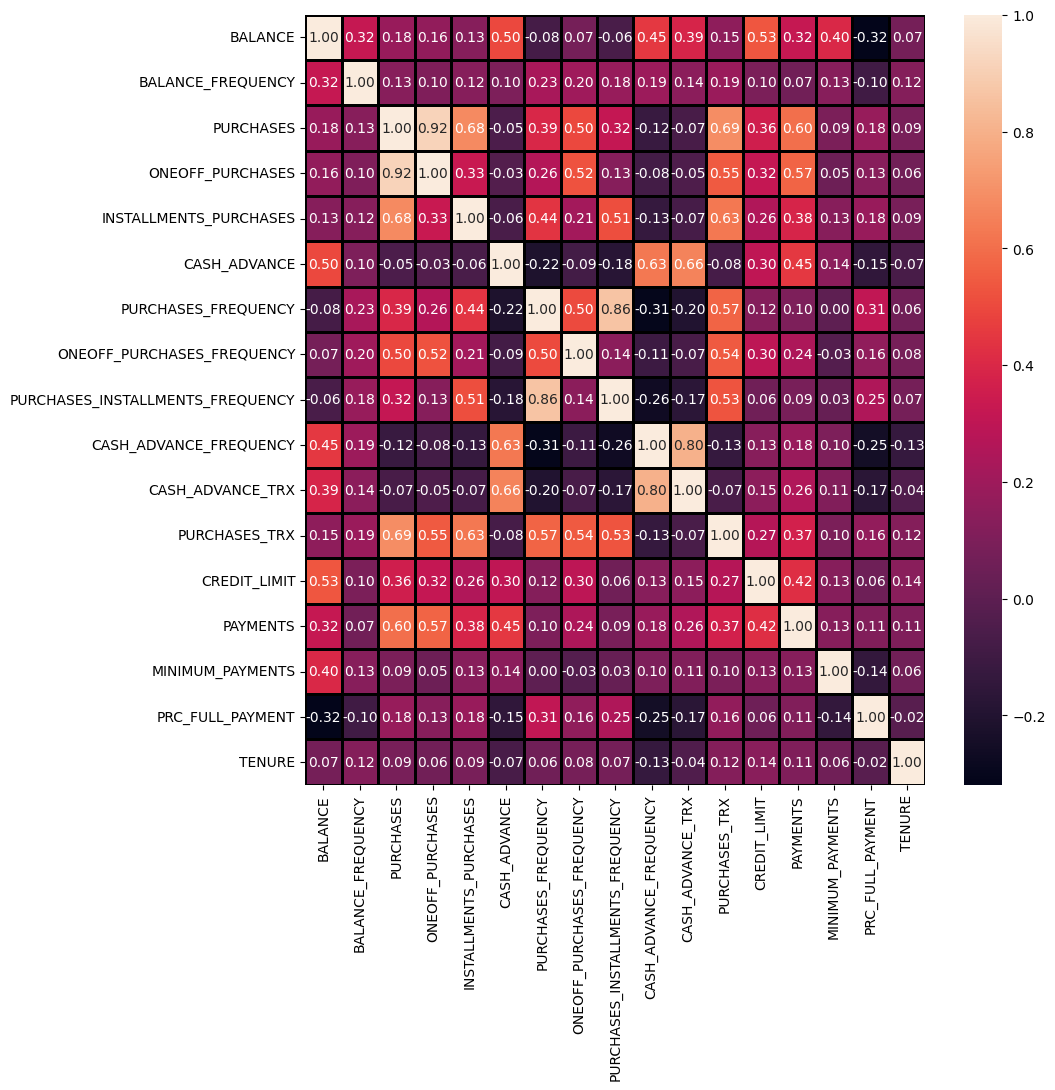

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', linewidths=1, linecolor='k')

In [ ]:
# def PlotBoxs(df, n_cols = 1, figsize=(20, 5)):
#     num_cols = df.select_dtypes(include='number').columns
#     n_rows = int(np.ceil(len(num_cols) / n_cols))
#     fig, axes = plt.subplots(n_rows, n_cols,figsize=figsize)
#     fig.suptitle("Box Plotting Numerical Columns", fontweight='bold')

#     axes = axes.flatten()
#     for i, col in enumerate(num_cols):
#         plt.sca(axes[i])
#         sns.boxplot(df, x=col)
#         plt.title(col.replace("_" ," ").title())
#     plt.tight_layout(pad=.5)
#     # fig.subplot_tool()

# PlotBoxs(df, 2, (20, 20))


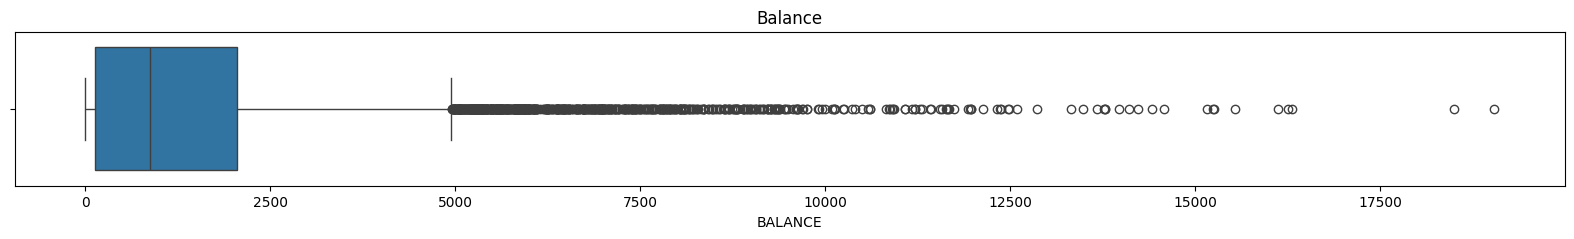

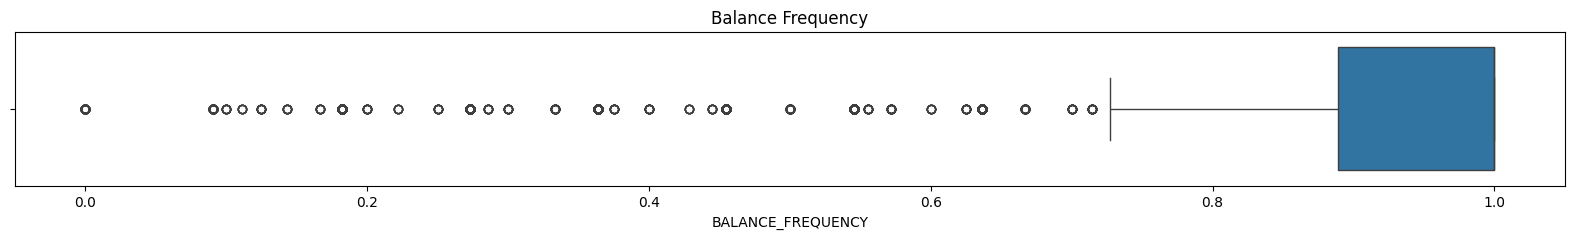

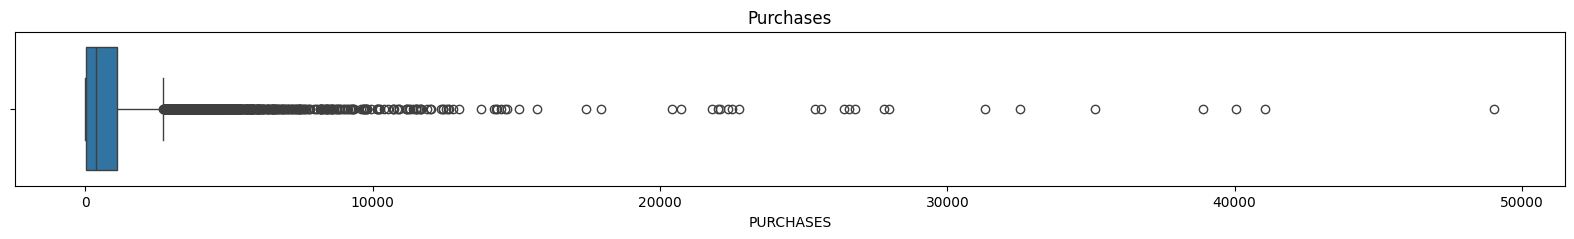

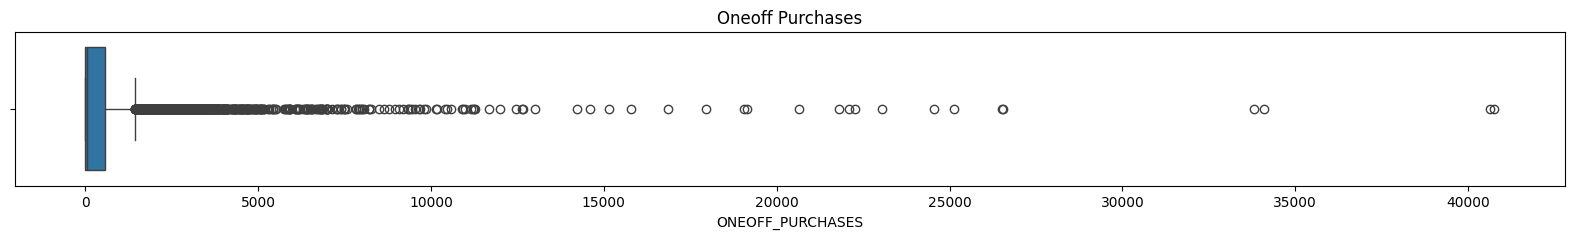

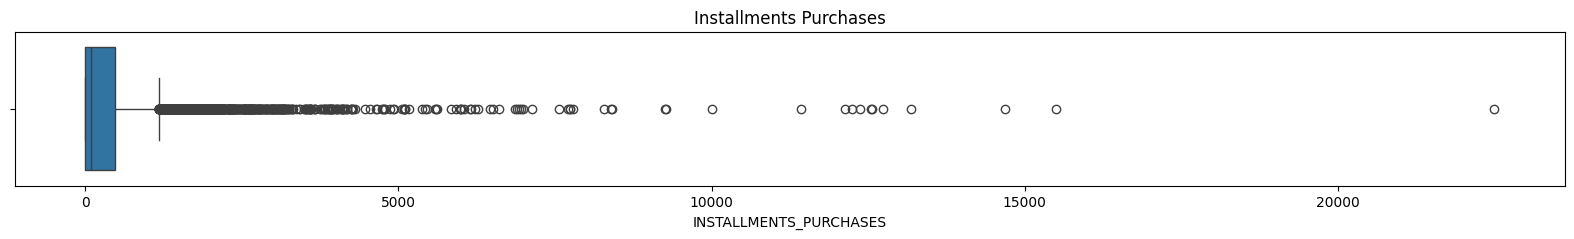

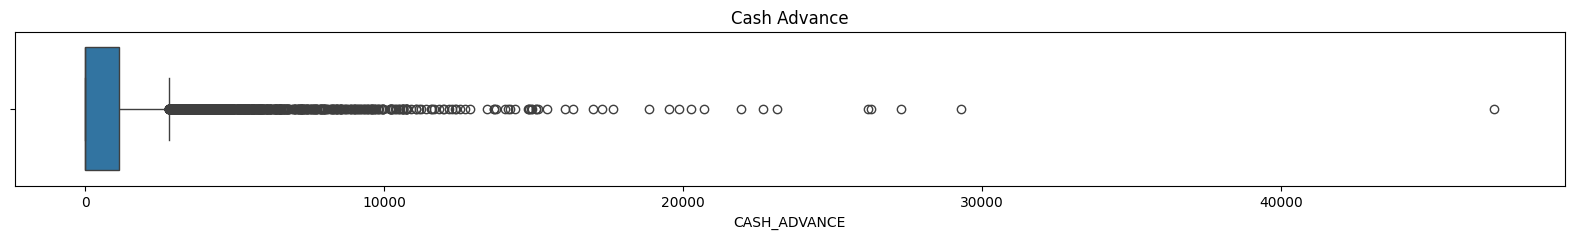

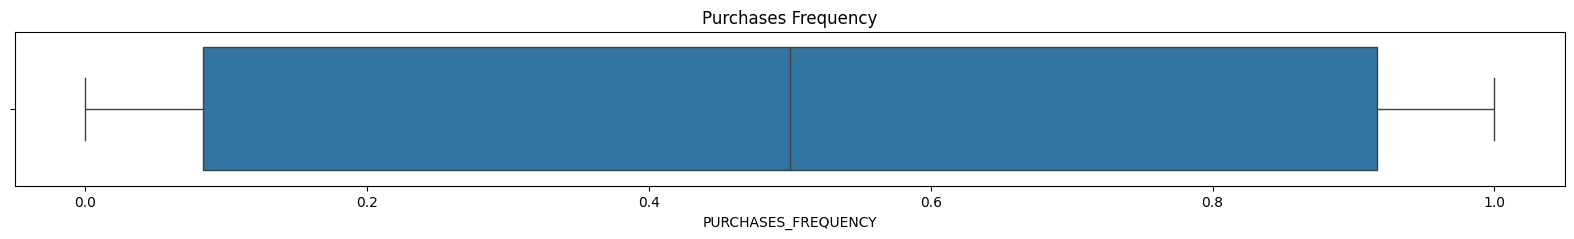

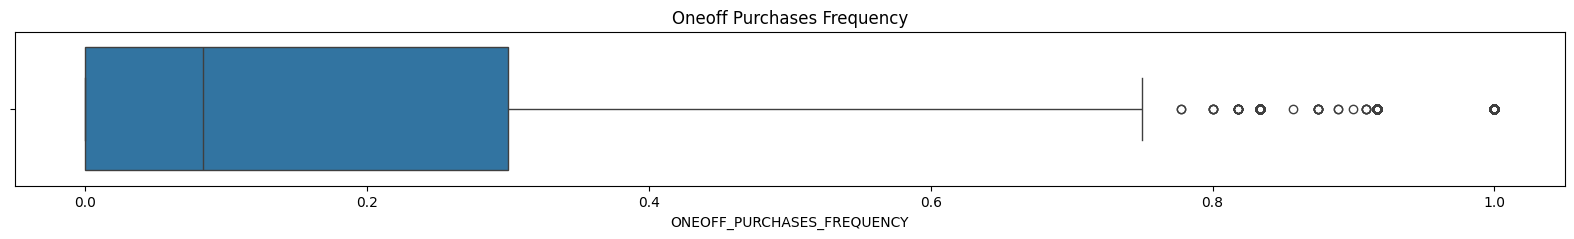

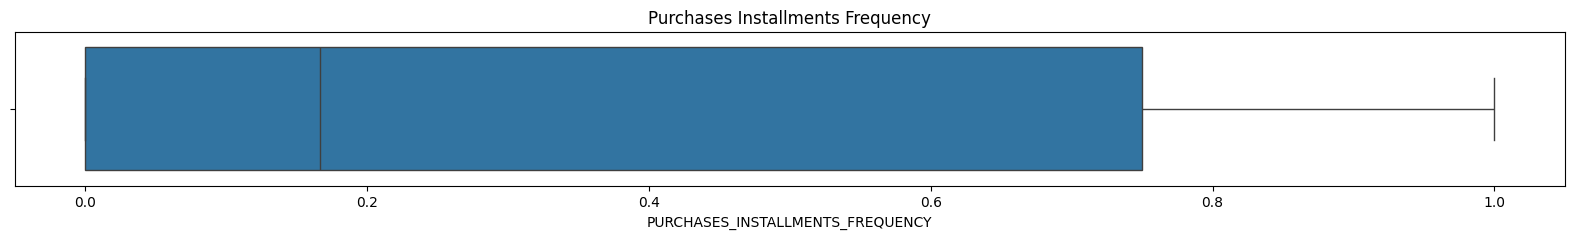

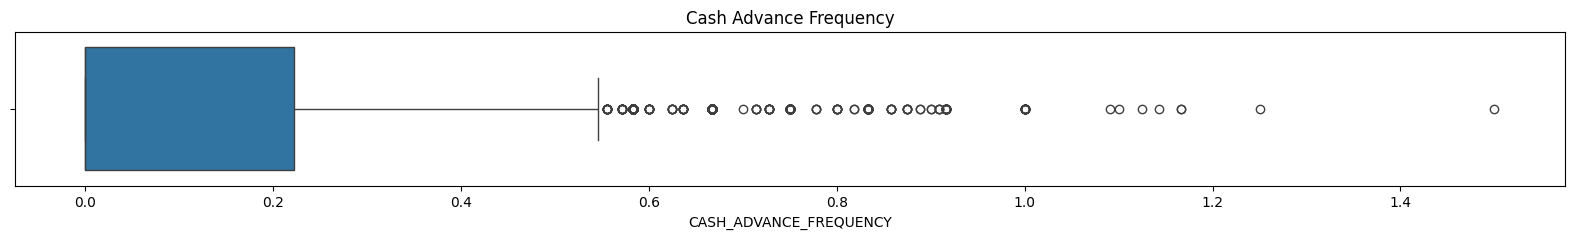

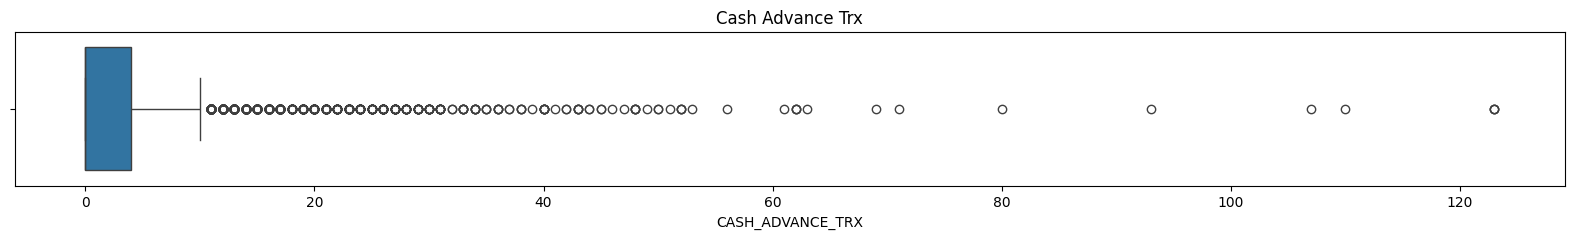

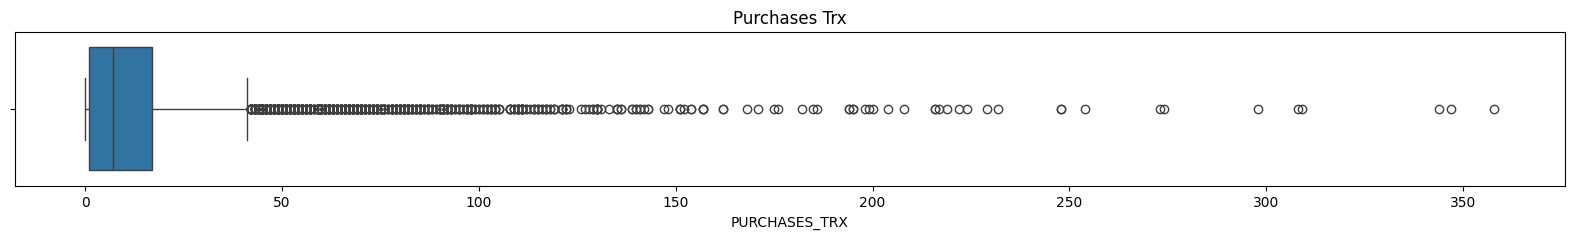

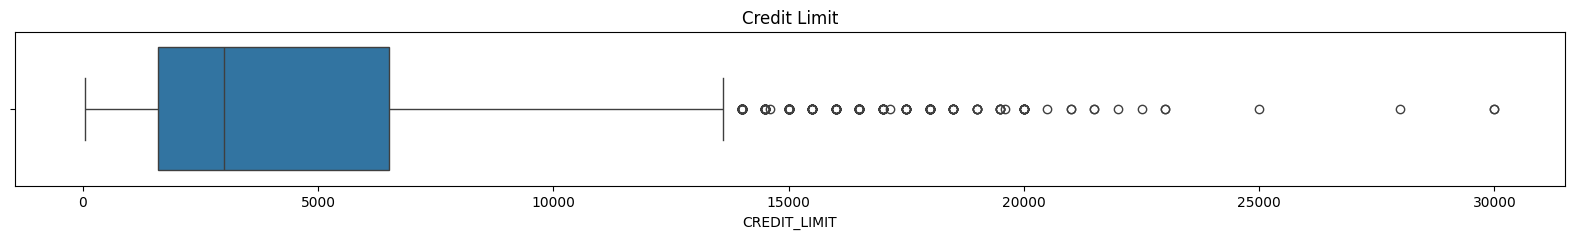

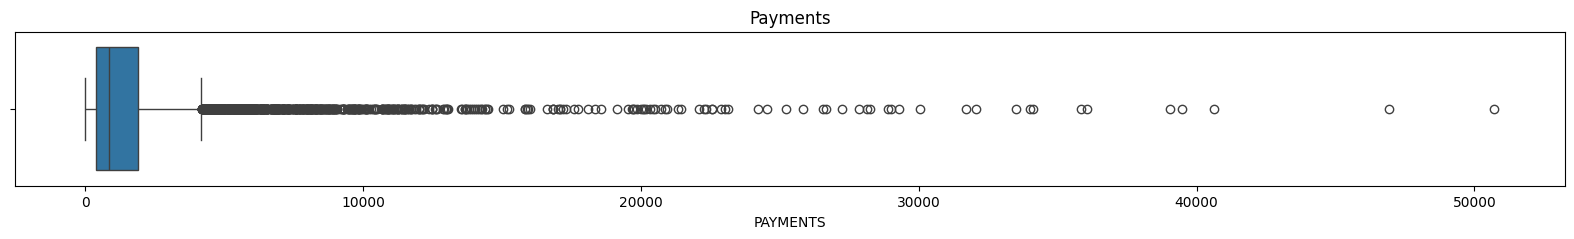

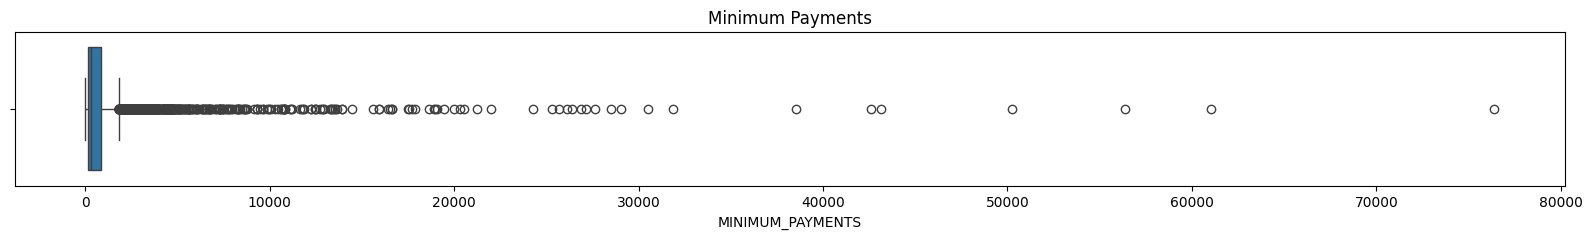

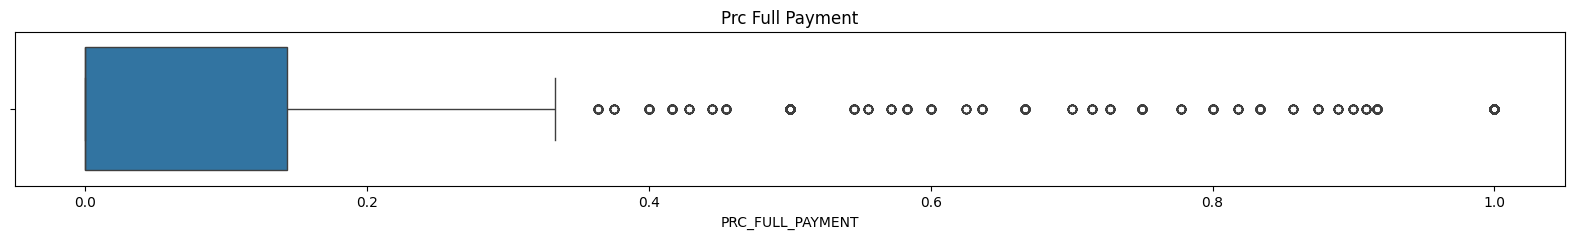

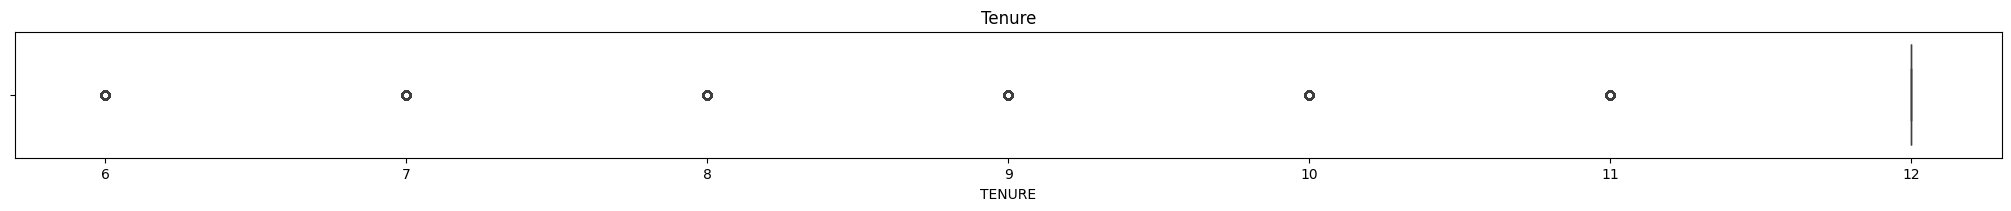

In [ ]:
def PlotBoxs(df, figsize=(20, 5)):
    num_cols = df.select_dtypes(include='number').columns

    for col in num_cols:
        plt.figure(figsize=figsize)
        sns.boxplot(df, x=col)
        plt.title(col.replace("_", " ").title())
    plt.tight_layout(pad=.3)
PlotBoxs(df, (20, 2))


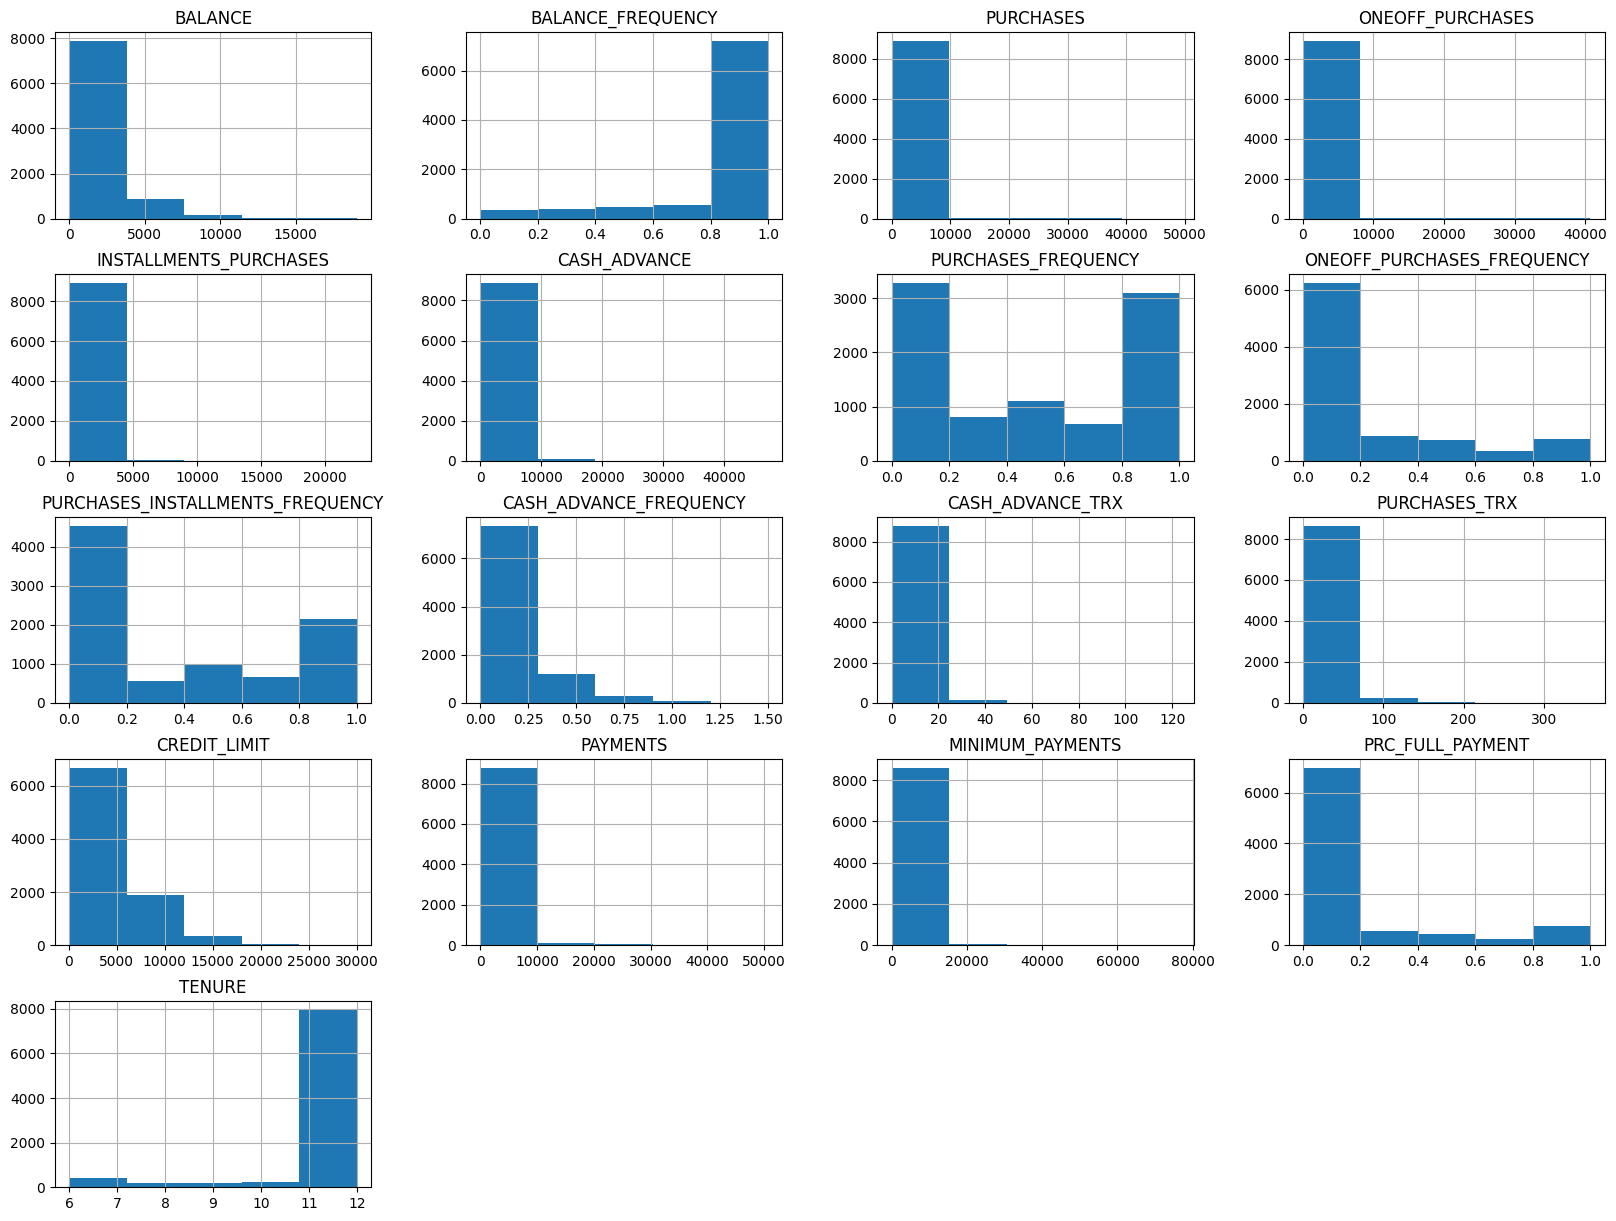

In [ ]:
df.select_dtypes(include='number').hist(bins=5, figsize=(20, 15), layout=(5, 4));

## 3. <a id="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Null values in columns (CREDIT_LIMIT, MINIMUM_PAYMENTS)          <br>
2- Different Scales and Outliers         <br>
3- Skeweness of the columns          <br>

In [11]:
#make a copy for the original dataset
df_copy=df.copy()
df_copy.drop(columns=['CUST_ID'], inplace=True)

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

##### Handling the null value in credit limit
After investigation, we found that we can't estimate the credit limit from the given data as it's an internal process of the bank.

So we decided to remove the row containing the null in credit limit.

In [12]:
#solution
df_copy = df_copy[df_copy['CREDIT_LIMIT'].notna()]

In [13]:
#test
df_copy['CREDIT_LIMIT'].isna().sum()

0

##### Handling the null value in minimum payments
After investigation, we found that we can't estimate the minimum payments from the given data as there is missing data to calculate the minimum paymetents which is Minimum Payment Rate.

So we decided to impute this column with an Iterative imputer. (still experimental for the sake of reusability we will use KNNImputer)

Drop the nulls will perform better after testing.

In [14]:
#solution
# num_cols = df_copy.select_dtypes(include='number').columns
# knn = KNNImputer()
# df_copy[num_cols] = knn.fit_transform(df_copy[num_cols])

# df_copy = df_copy[df_copy['MINIMUM_PAYMENTS'].notna()].shape
df_copy.dropna(axis=0, inplace=True)

In [15]:
#test
print(f"Null Count is the data : {df_copy.isna().sum().sum()}")

Null Count is the data : 0


**Second issue**

we need to make the scale of the different columns in near ranges. While we are scaling the data we need to notice the outlier and consider them.
The outliers are necesary part of the data that we can't remove. So we need to handle them differentlly.

**<a href=#4>Handled in Section 4</a>**

## 🚁 Supportin **Function**

### 📺 T-SNE Functions

In [16]:
sns.color_palette(palette='Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [17]:
sns.color_palette(palette='CMRmap')

[(0.16941176470588235, 0.15, 0.5323529411764706),
 (0.3870588235294118, 0.16450980392156864, 0.6774509803921569),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.9419607843137255, 0.3950980392156863, 0.06294117647058822),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.8805882352941177, 0.44823529411764707)]

In [18]:
def TSNE_2D_VIS(df, hue=None, title='T-SNE', p='CMRmap'):
    assert df.shape[1] == 2, "The 2nd Dimention should 2!!"
    sns.scatterplot(x = df[:, 0], y = df[:, 1], alpha=.7,
                    hue=hue, edgecolor='gray', palette=p)
    plt.title(title);

def TSNE_2D(df, perplexity=30, n_iter=500, init='pca',
            verbose=0, hue=None, title="Projection on 2D (T-SNE)"):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, init=init, verbose=verbose)
    df_2d = tsne.fit_transform(df)

    TSNE_2D_VIS(df_2d, hue=hue, title=title)

    return df_2d

### 🖊 Printing Formats

In [19]:
km_fmt = "K-Means visualized with T-SNE ({data_type}) [{score:.2f}]"
km_kpca_fmt = "K-Means After Applying K-PCA({kernel}) visualized with T-SNE ({dtype}) [{score:.2f}]"
db_fmt = 'DBSCAN visualized with T-SNE ({dtype}) [{score:.2f}]'
gm_fmt = 'Gaussian Mixture visualised with T-SNE ({}) [{:.2f}]'
hc_fmt = """Hierarchical Clustering visualized with T-SNE ({df_name})
({linkage}, {metric}) [{score:.2f}]"""

## 4. <a id="4">Features transformation</a>
(<a href="#0">Go to top</a>)

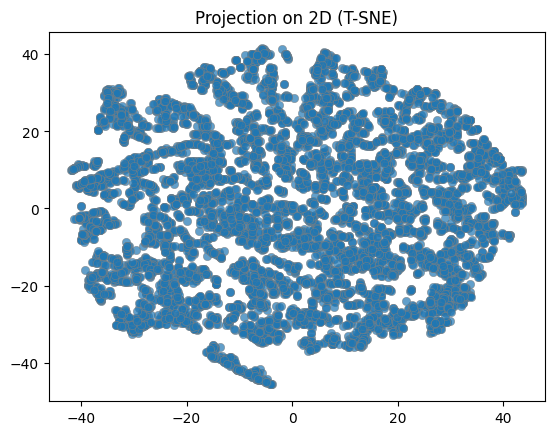

In [20]:
df_2d = TSNE_2D(df_copy)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

#### Robust Scaler

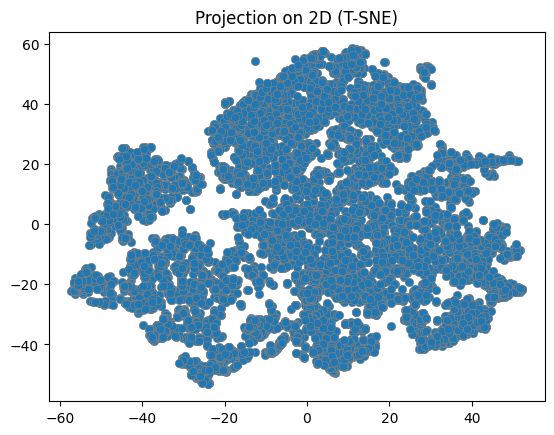

In [ ]:
robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(df_copy)
robust_df = pd.DataFrame(robust_df, index=df_copy.index, columns=df_copy.columns)
robust_2d = TSNE_2D(robust_df, perplexity=50, n_iter=700)

#### Log Transformation

In [21]:
log_df = df_copy + .05
log_df = log_df.apply(np.log)

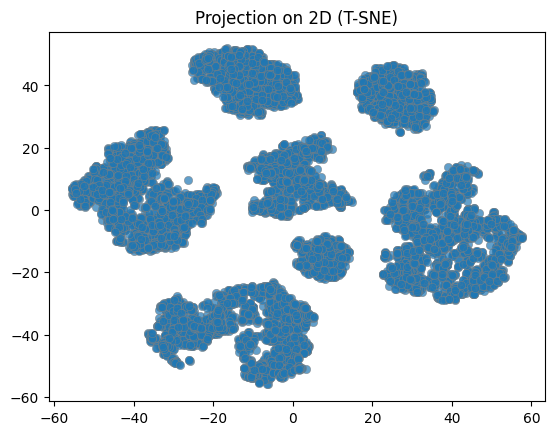

In [22]:
log_2d = TSNE_2D(log_df, 50, 700)

Answer here:

- **log Transformation** is the best transfomation on the data as when visualized with t-sne it gives us more seprable clusters.
- **Standard and Min-Max scalers** are not suitable at all for this data as the data contain extrem outliers, and these scalers doesn't perform well with them.
- **Robust scaler** is great with dealing with outliers, but when visualized with t-sne, the data wasn't cultered well.

🚀 So We Go With ***Log Transformation***

## 5. <a id="5">⚙ K-Means</a>
(<a href="#5">Go to top</a>)

#### 1- Custom-Made K-Means

In [23]:
def kMeansInitCentroids(X, K):
    m = X.shape[0]
    idx = np.random.choice(m, K, replace=False)
    centroids = X[idx]

    return centroids

def computeCentroids(X, idx, K=2):

    n = X.shape[1]
    centroids = np.zeros((K, n))

    for i in range(K):
        cluster_points = X[idx == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)

    return centroids

def findClosestCentroids(X, centroids):
    m = X.shape[0]
    closest_centroids = np.zeros(m)

    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        closest_centroids[i] = np.argmin(distances)

    return closest_centroids


In [24]:
def k_means(X, k):
    centroids = kMeansInitCentroids(X, k)
    idx = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, idx, k)

    return centroids, idx

In [ ]:
centroids, idx = k_means(np.array(log_df), 7)

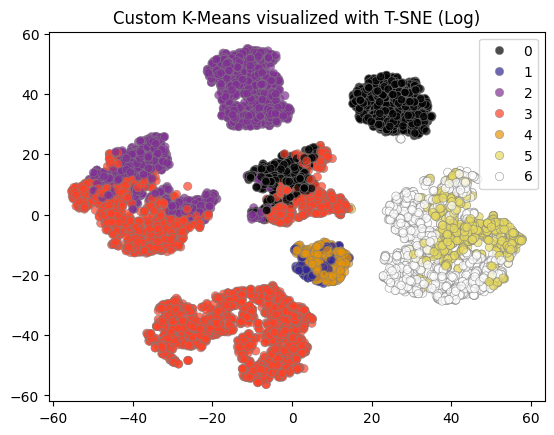

In [ ]:
TSNE_2D_VIS(log_2d, idx, "Custom K-Means visualized with T-SNE (Log)")

#### 2- SKLearn K-Means
#### 5- Using different techniques for scaling

In [25]:
def KMeans_Plot(base, _2d, k, data_type='Original'):
    km = KMeans(n_clusters=k)
    km = km.fit(base)
    labels = km.labels_

    score = silhouette_score(base, labels)
    TSNE_2D_VIS(_2d, labels, km_fmt.format(k=k, data_type=data_type, score=score))

##### No Transformation

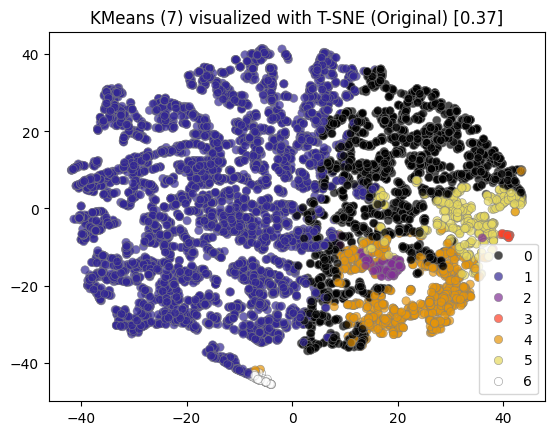

In [ ]:
KMeans_Plot(df_copy, df_2d, 7)

##### Robust Scaler

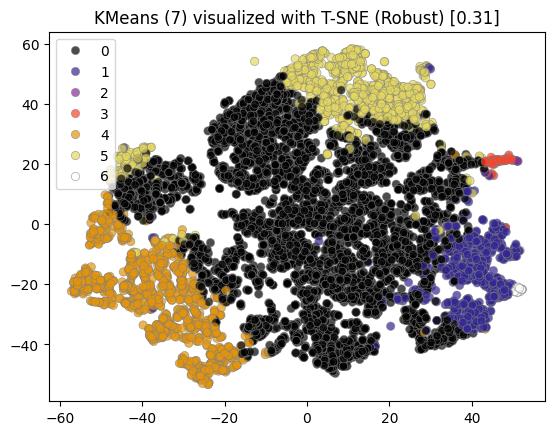

In [ ]:
KMeans_Plot(robust_df, robust_2d, 7, 'Robust')

##### Log Transformation

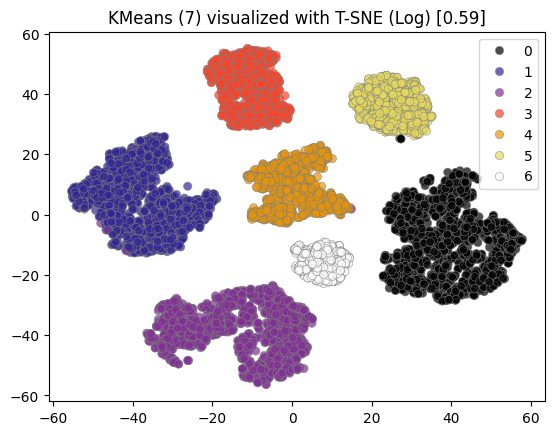

In [ ]:
KMeans_Plot(log_df, log_2d, 7, 'Log')

#### 3- ⏰ [The Elbow & Silhouette](https://www.youtube.com/watch?v=ARjx__t5OCI)

In [26]:
def PlotElbow(krange, wcss):
    plt.figure(figsize=(10,5))
    plt.plot(krange, wcss, marker = 'o' )
    plt.xlabel('Number of Clusters K')
    plt.ylabel('Within-Cluster-Sum of Squared Errors (Inertia)')
    plt.grid()
    plt.xticks(krange)
    plt.title("Elbow Method");

def PlotSilhouette(krange, scores):
    plt.figure(figsize=(10,5))
    plt.plot(krange, scores, marker = 'o' )
    plt.xlabel('Number of Clusters K')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.xticks(krange)
    plt.title("Silhouette Method");

In [27]:
def Elbow_Silh(df, low, high):
    wcss = []
    silhouette_scores = []
    krange = range(low, high)
    for k in krange:
        model = KMeans(n_clusters=k)
        model.fit(df)

        w = model.inertia_
        s = silhouette_score(df, model.labels_)
        wcss.append(w)
        silhouette_scores.append(s)
    return krange, wcss, silhouette_scores

###### Gap Statistics

In [ ]:
%%capture
!pip install gap-stat

In [ ]:
from gap_statistic import OptimalK

13

##### Robust Scaled

In [ ]:
opt = OptimalK()
opt_k = opt(robust_df, cluster_array=range(2, 10))
opt_k

9

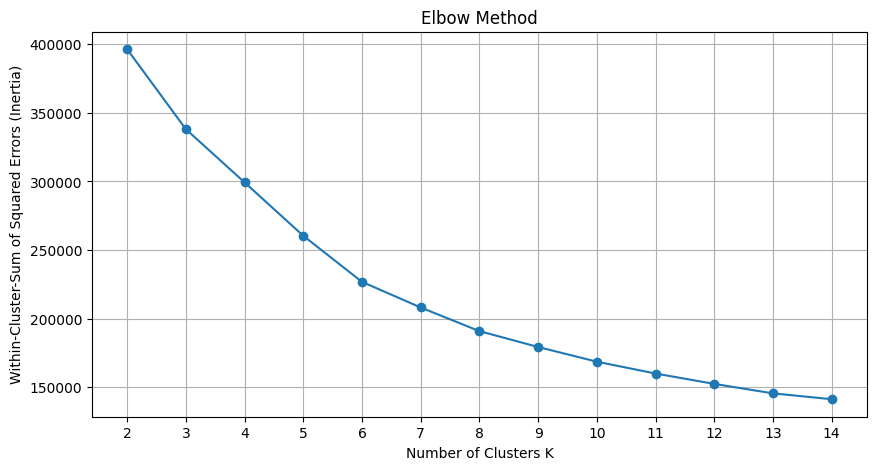

In [ ]:
krange, wcss, silhouette_scores = Elbow_Silh(robust_df, 2, 15)
PlotElbow(krange, wcss)

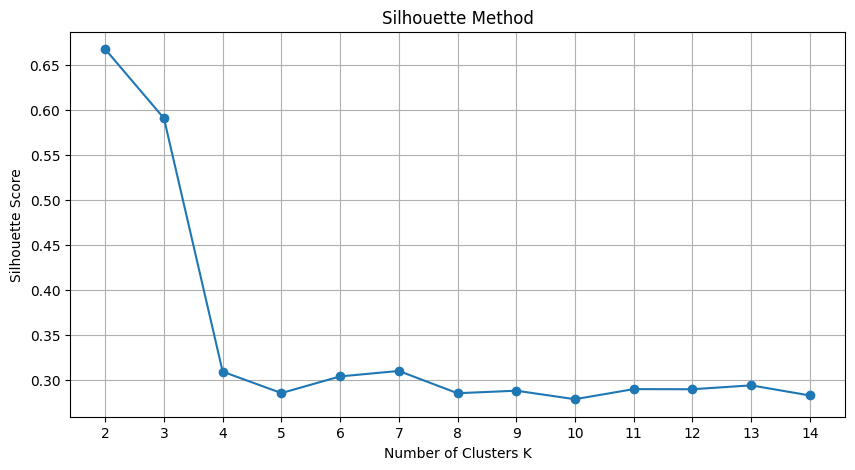

In [ ]:
PlotSilhouette(krange, silhouette_scores)

##### Log Transformed

In [ ]:
opt = OptimalK()
opt_k = opt(log_df, cluster_array=range(2, 10))
opt_k

9

In [ ]:
krange, wcss, silhouette_scores = Elbow_Silh(log_df, 2, 15)

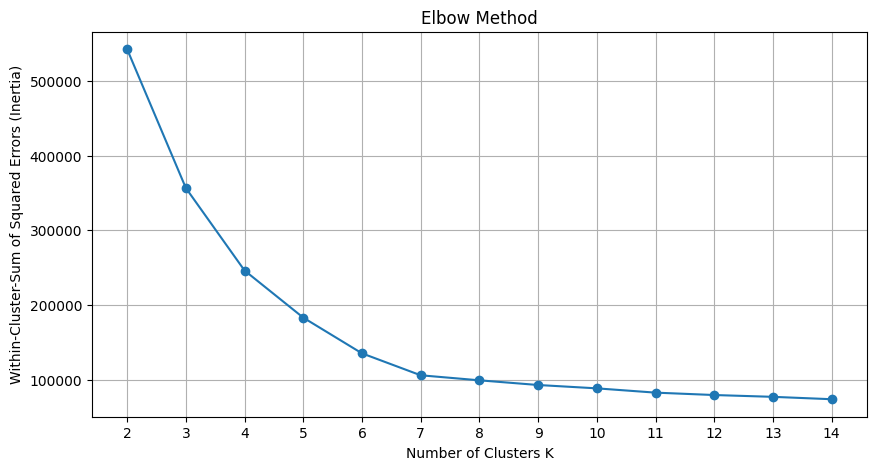

In [ ]:
PlotElbow(krange, wcss)

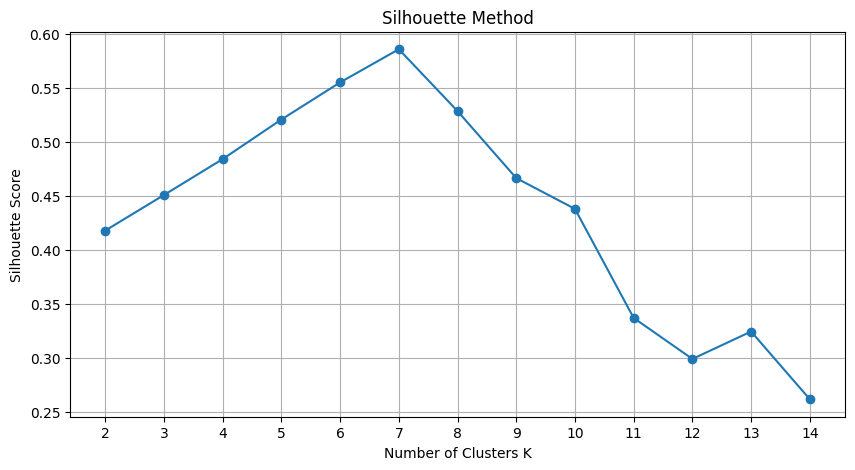

In [ ]:
PlotSilhouette(krange, silhouette_scores)

- With Robust:
            we noticed that ⤵
                - In Elbow, There we no clear elbow point as the curve is moving smoothly.
                - In Silhouette, The maximum is at 2.
            ⭐ silhouette score can be misleading when the data is not easily separable.

- With Log:
            we noticed that ⤵
                - In Elbow, The elbow point is clear at 7.
                - In Silhouette, The maximum is at 7.
            ⭐It's clear now that the optimal k for this data is 7 from the 2 methods.

## 6. <a id="5">Hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


### Dendrogram

Before we start the training process we need to specify 3 paramters:<br>
1- **Linkage criteria** : The linkage criterion determines the distance between two clusters:

- Complete-Linkage Clustering
- Single-Linkage Clustering
- Average-Linkage Clustering
- Centroid Linkage

2- **Distance function**:
- Euclidean Distance
- Manhattan Distance
- Mahalanobis distance

3- Number of clusters


 ***Number of clusters***

Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [28]:
import scipy.cluster.hierarchy as shc

def DendrogramPlot(df, method, metric, orient):
    plt.figure(figsize=(10, 7))
    plt.title(f"Dendrogram of Hierarchical Clustring with {method} method and {metric} metric")
    dend = shc.dendrogram(shc.linkage(y=log_df ,
                                    method = method, metric=metric),orientation=orient)
# DendrogramPlot(log_df, 'ward', 'eclidean', 'top')

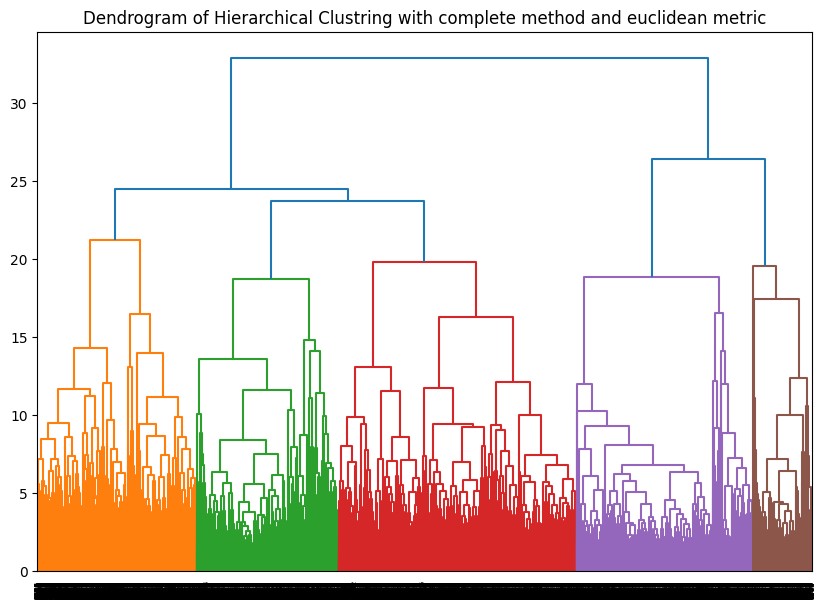

In [ ]:
DendrogramPlot(log_df, 'complete', 'euclidean', 'top')

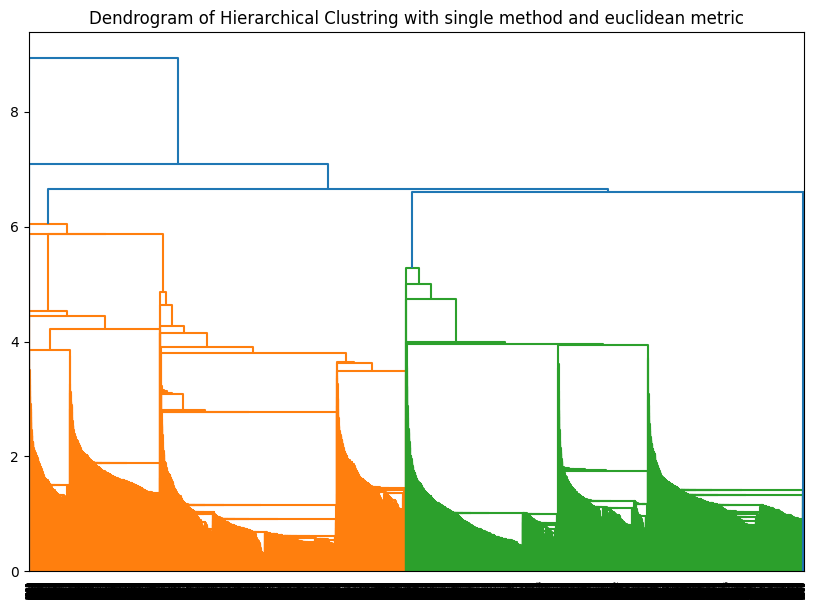

In [ ]:
DendrogramPlot(log_df, 'single', 'euclidean', 'top')

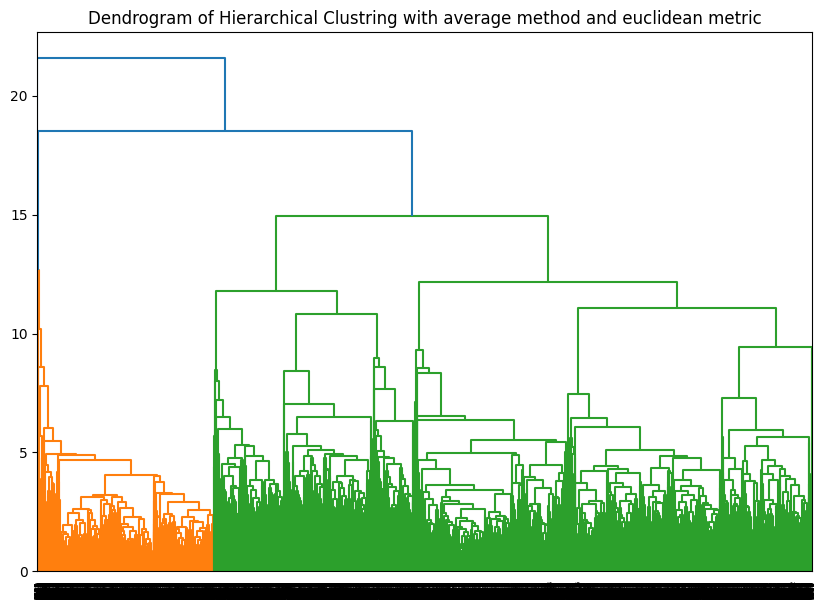

In [ ]:
DendrogramPlot(log_df, 'average', 'euclidean', 'top')

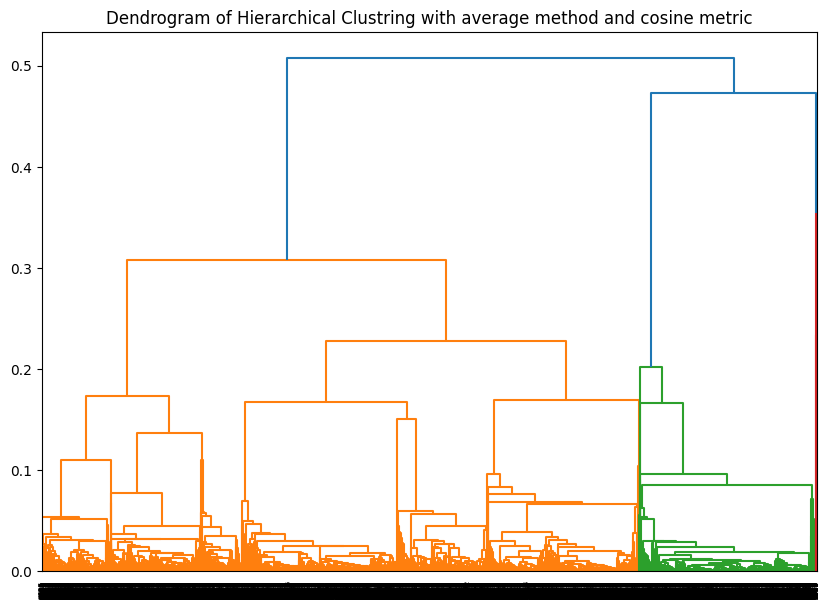

In [ ]:
DendrogramPlot(log_df, 'average', 'cosine', 'top')

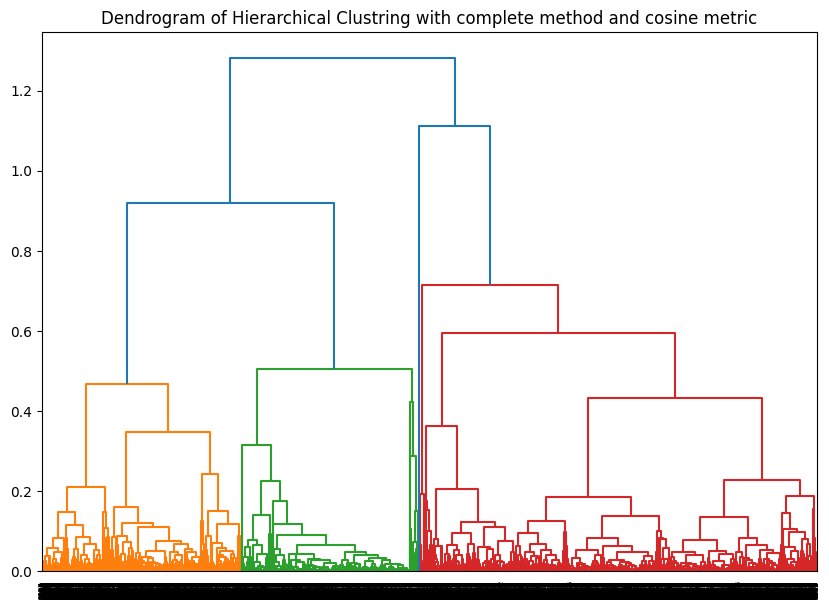

In [ ]:
DendrogramPlot(log_df, 'complete', 'cosine', 'top')

### 🍴 Agglomerative Clustring

In [29]:
#training
from sklearn.cluster import AgglomerativeClustering
def AggClusteringLabels(df, n, metric='euclidean', linkage='ward'):
    agg = AgglomerativeClustering(n_clusters=n, metric=metric, linkage=linkage)
    agg = agg.fit(df)
    labels = agg.labels_
    return labels

def AggClusteringPlot(df, labels, title):
    TSNE_2D_VIS(df, labels, title)

def AggClustering(base, _2d, n, df_name="Original", metric='euclidean', linkage='ward'):
    labels = AggClusteringLabels(base, n, metric, linkage)
    score = silhouette_score(base, labels)
    AggClusteringPlot(_2d, labels,
                      hc_fmt.format(df_name=df_name, linkage=linkage, metric=metric, score=score))
    return labels


##### Original

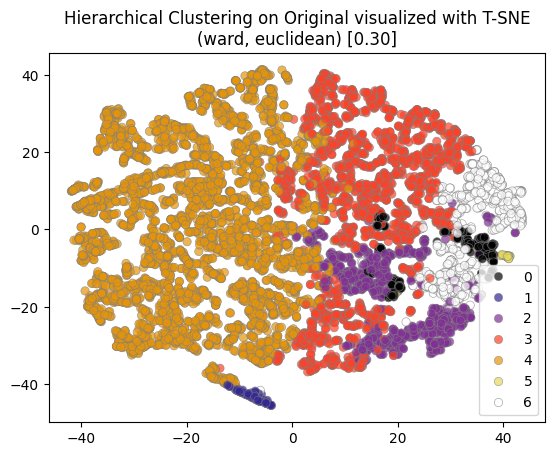

In [ ]:
AggClustering(df_copy, df_2d, 7);

##### Robust Scaled

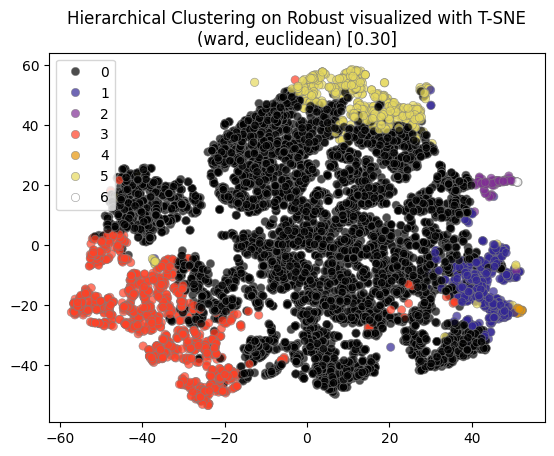

In [ ]:
AggClustering(robust_df, robust_2d, 7, 'Robust');

##### Log Scaled

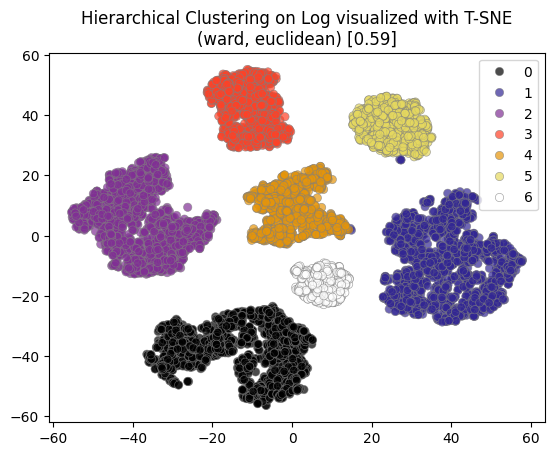

In [ ]:
AggClustering(log_df, log_2d, 7, 'Log');

## 6. <a id="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

### DBSCAN

In [ ]:
# db_fmt = 'DBSCAN visualized with T-SNE ({dtype}) [{score:.2f}]'

In [37]:
def DBSCAN_Plot(base, _2d, eps=.5, min_samples=5, dtype='Original'):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db = db.fit(base)
    labels = db.labels_
    try:
        score = silhouette_score(base, labels)
    except:
        print("Number of labels is 1. Valid values are 2 to n_samples - 1")
        score = np.inf

    TSNE_2D_VIS(_2d, labels, db_fmt.format(dtype=dtype, score=score))
    return labels

##### Original

Number of labels is 1. Valid values are 2 to n_samples - 1


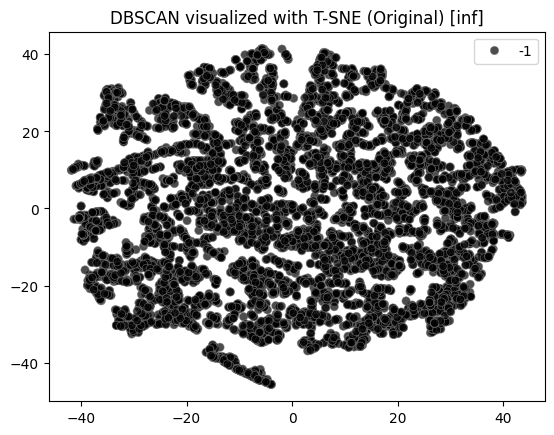

In [ ]:
DBSCAN_Plot(df_copy, df_2d, min_samples=300, dtype='Original');

##### Robust

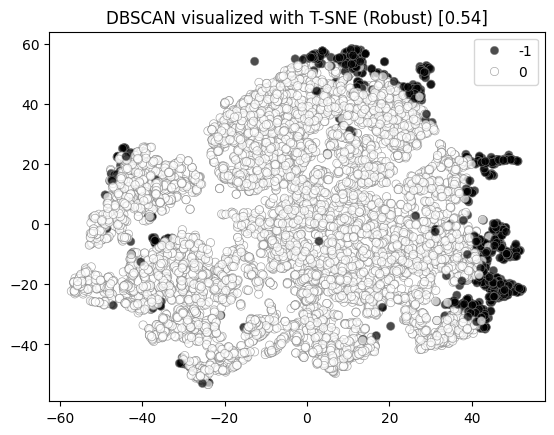

In [ ]:
DBSCAN_Plot(robust_df, robust_2d, eps=4, min_samples=300, dtype='Robust');

##### Log

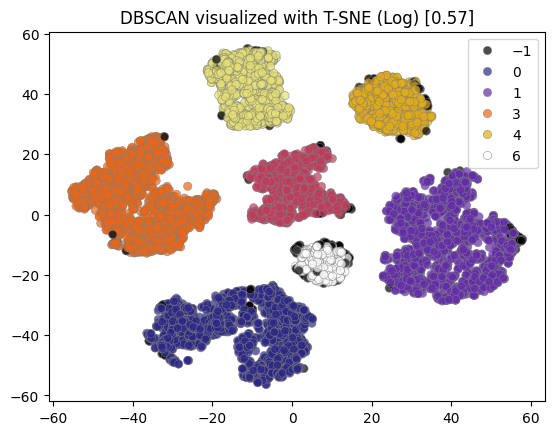

In [ ]:
DBSCAN_Plot(log_df, log_2d, eps=4, min_samples=300, dtype='Log');

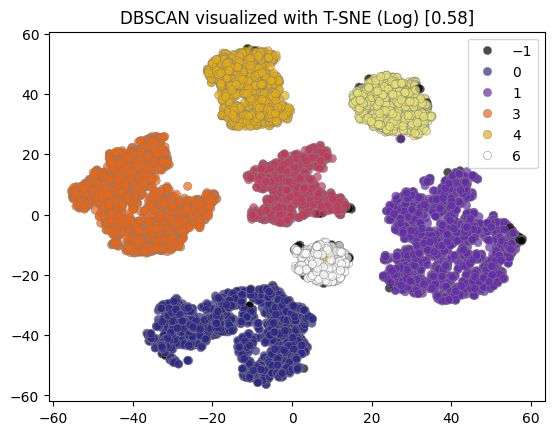

In [ ]:
DBSCAN_Plot(log_df, log_2d, eps=4.5, min_samples=300, dtype='Log');

### PCA

In [31]:
from sklearn.decomposition import PCA, KernelPCA

##### Original

N. Components -> 5


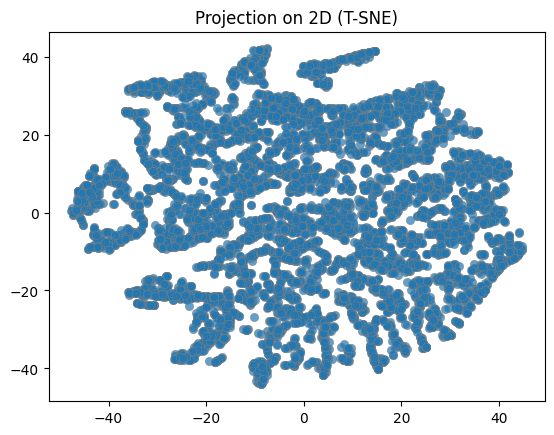

In [32]:
pca = PCA(n_components=.95)
pca_df = pca.fit_transform(df_copy)
# print(f"Explained Variance -> {pca.explained_variance_}")
# print(f"Explained Variance Ratio -> {pca.explained_variance_ratio_}")
print(f"N. Components -> {pca.n_components_}")
TSNE_2D(pca_df);

#### Log

N. Components -> 5


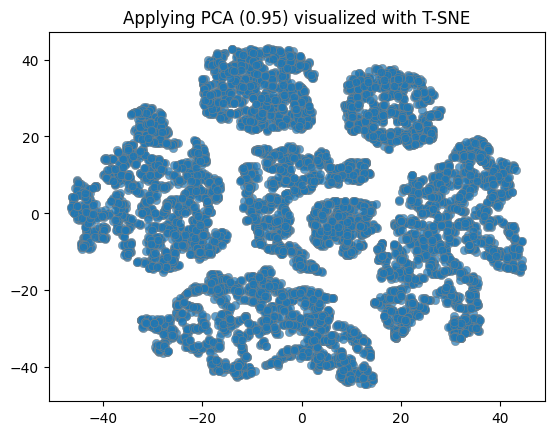

In [33]:
nc = .95
pca = PCA(n_components=nc)
pca_log_df = pca.fit_transform(log_df)
print(f"N. Components -> {pca.n_components_}")
pca_log_2d = TSNE_2D(pca_log_df, title=f"Applying PCA ({nc}) visualized with T-SNE");

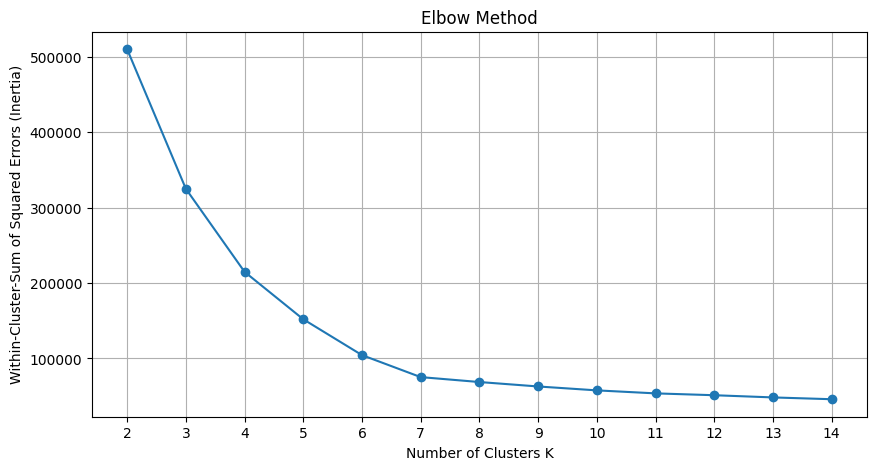

<Figure size 640x480 with 0 Axes>

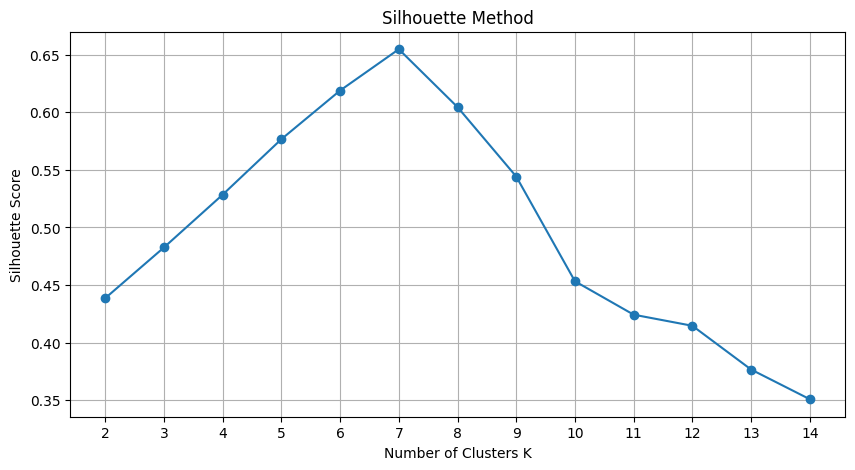

In [ ]:
krange, wcss, silhouette_scores = Elbow_Silh(pca_log_df, 2, 15)
PlotElbow(krange, wcss);
plt.figure();
PlotSilhouette(krange, silhouette_scores);

##### K-Means with PCA

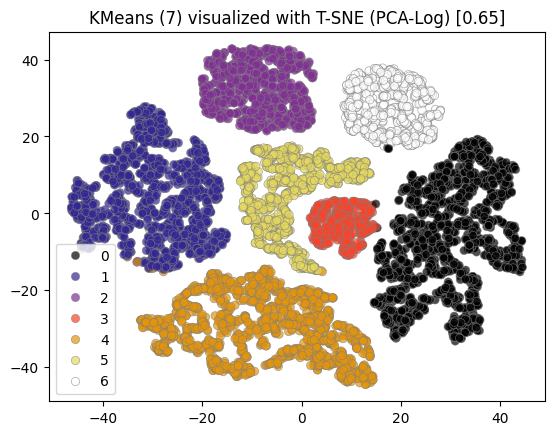

In [ ]:
KMeans_Plot(pca_log_df, pca_log_2d, 7, 'PCA-Log')

### Kernal PCA

In [42]:
def KMeans_KPCA_Plot(base, k_clusters, nc=None, kernel='poly', dtype='Original'):
    kpca = KernelPCA(n_components=nc, kernel=kernel)
    kpca_df = kpca.fit_transform(base)

    labels = KMeans(n_clusters=k_clusters).fit(kpca_df).labels_

    score = silhouette_score(kpca_df, labels)

    kpca_2d = TSNE_2D(kpca_df, hue=labels,
            title=km_kpca_fmt.format(kernel=kernel, dtype=dtype, score=score));
    return kpca_df, kpca_2d, labels

##### kernel PCA (Poly)




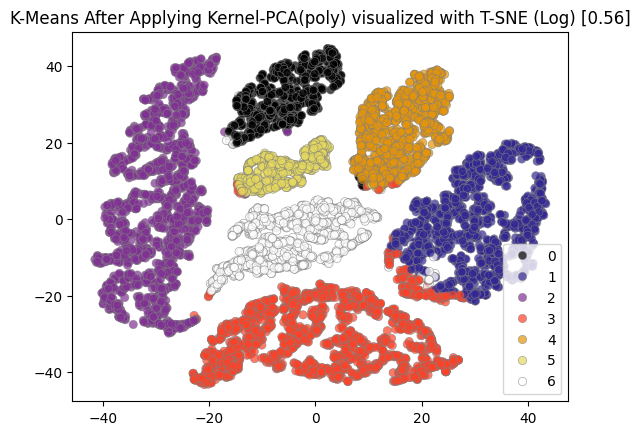

In [ ]:
kpca_log_df, kpca_log_2d = KMeans_KPCA_Plot(log_df, 7, nc=7, kernel='poly', dtype='Log')

##### Kernel PCA (Cosine)

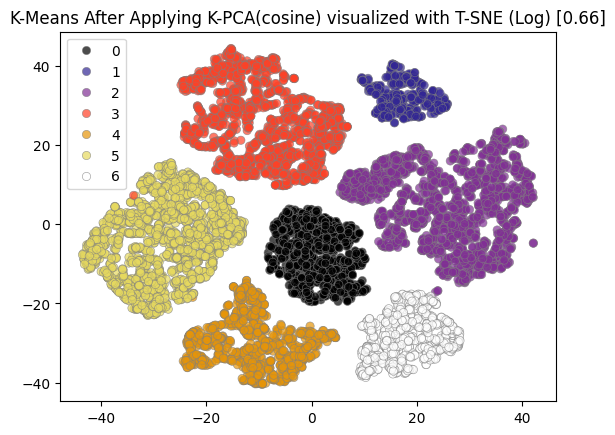

In [ ]:
kpca_log_cos_df, kpca_log_cos_2d = KMeans_KPCA_Plot(log_df, 7, nc=5, kernel='cosine', dtype='Log')

##### DBSCAN with PCA

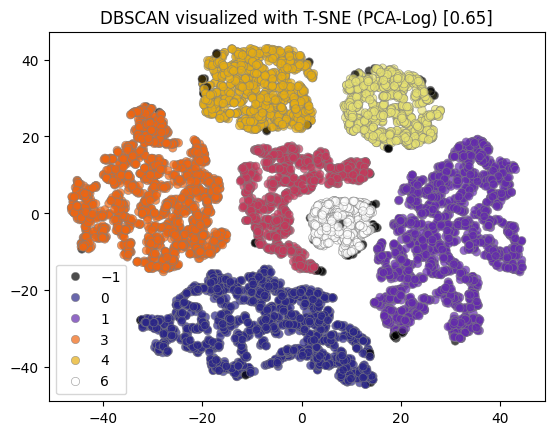

In [ ]:
DBSCAN_Plot(pca_log_df, pca_log_2d, 3, 200, 'PCA-Log');

### EM (GaussianMixture)

In [35]:
from sklearn.mixture import GaussianMixture

In [36]:
def GMPlot(base, _2d, n=2, type='Original'):
    gm = GaussianMixture(n_components=n)
    gm = gm.fit(base)
    labels = gm.predict(base)
    score = silhouette_score(base, labels)
    TSNE_2D_VIS(_2d, labels, gm_fmt.format(type, score))

#### Log

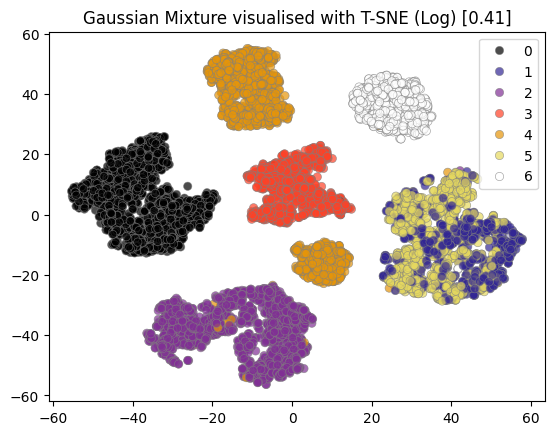

In [ ]:
GMPlot(log_df, log_2d, n=7, type='Log')

#### Robust

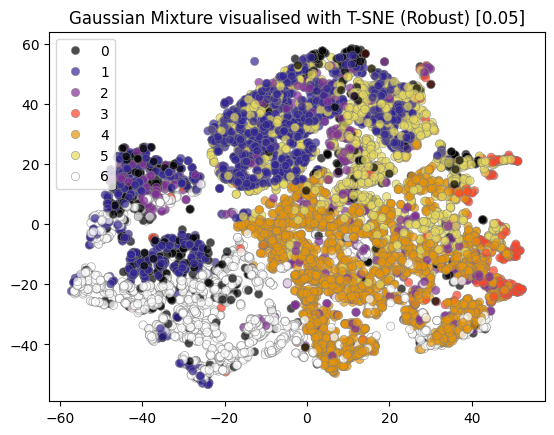

In [ ]:
GMPlot(robust_df, robust_2d, n=7, type='Robust')

#### PCA & Log

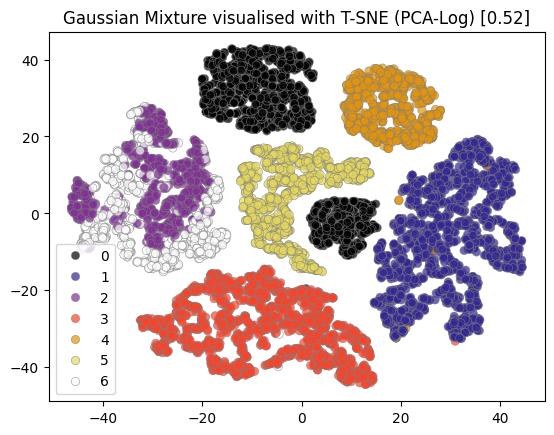

In [ ]:
GMPlot(pca_log_df, pca_log_2d, n=7, type='PCA-Log')

#### K-PCA & Log

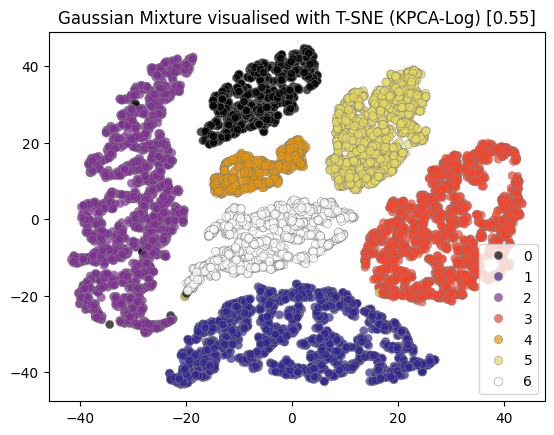

In [ ]:
GMPlot(kpca_log_df, kpca_log_2d, n=7, type='KPCA-Log')

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method

# 📣 Clusters Analysis

## Models Summary

| **_Algorithm_**         	| **_Params_**                                          	| **_Data_** 	| **_Silhouette*100_** 	|
|-------------------------	|-------------------------------------------------------	|------------	|----------------------	|
| KMeans                  	| n_clusters=7                                          	| robust     	| 31                   	|
| KMeans                  	| n_clusters=7                                          	| log        	| 59                   	|
| KMeans                  	| n_clusters=7  && PCA(n_componets=.95)                 	| log        	| **65**               	|
| KMeans                  	| n_clusters=7  && KPCA(n_componets=7, kernel='poly')   	| log        	| 56                   	|
| KMeans                  	| n_clusters=7  && KPCA(n_componets=7, kernel='cosine') 	| log        	| **66**               	|
| KMeans                  	| n_clusters=7  && KPCA(n_componets=5, kernel='cosine') 	| log        	| **70**               	|
| AgglomerativeClustering 	| n_clusters=7, linkage=ward, metric=euclidean          	| original   	| 30                   	|
| AgglomerativeClustering 	| n_clusters=7, linkage=ward, metric=euclidean          	| robust     	| 30                   	|
| AgglomerativeClustering 	| n_clusters=7, linkage=ward, metric=euclidean          	| log        	| 59                   	|
| DBSCAN                  	| eps=4, min_samples=300                                	| robust     	| 54                   	|
| DBSCAN                  	| eps=4, min_samples=300                                	| log        	| 57                   	|
| DBSCAN                  	| eps=4, min_samples=300                                	| log        	| 58                   	|
| DBSCAN                  	| eps=3, min_samples=200 && PCA(n_componets=.95)        	| log        	| **65**               	|
| GaussianMixture         	| n_components=7                                        	| log        	| 41                   	|
| GaussianMixture         	| n_components=7  && PCA(.95)                           	| log        	| 41                   	|

## 🔭 Analysis

### Best Models

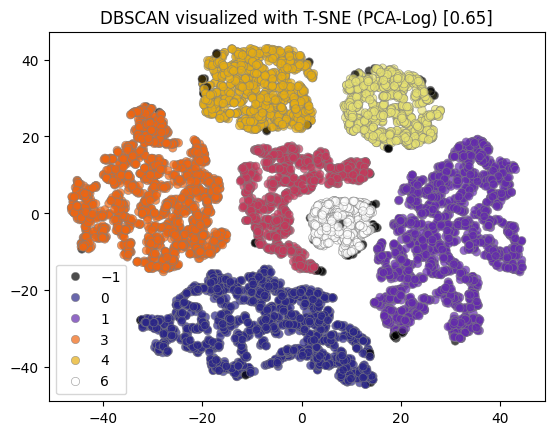

In [38]:
db_labels = DBSCAN_Plot(pca_log_df, pca_log_2d, 3, 200, 'PCA-Log');

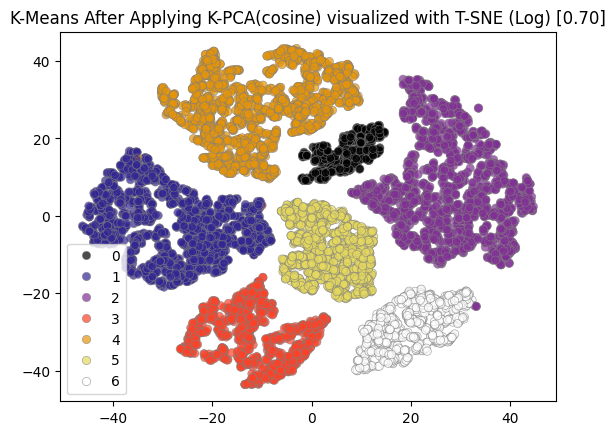

In [43]:
kpca_log_cos_df, kpca_log_cos_2d, km_labels = KMeans_KPCA_Plot(log_df, 7, nc=5, kernel='cosine', dtype='Log')

In [58]:
new_df = df.copy()
new_df.drop(columns=['CUST_ID'], inplace=True)
new_df.dropna(inplace=True)

In [59]:
new_df['kmeans'] = km_labels
new_df['dbscn'] = db_labels

In [60]:
new_df['kmeans'].unique()

array([4, 2, 3, 1, 0, 5, 6], dtype=int32)

Columns of interest are
> 'BALANCE'

In [61]:
new_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'kmeans', 'dbscn'],
      dtype='object')

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

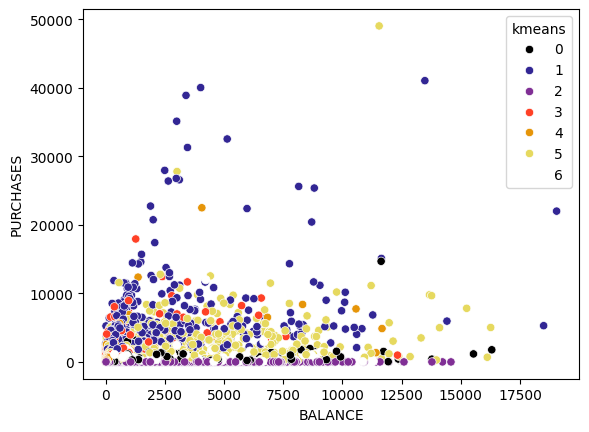

In [65]:
sns.scatterplot(data=new_df, x='BALANCE', y= 'PURCHASES', hue='kmeans', palette='CMRmap')

In [66]:
stat = new_df.groupby('kmeans').mean()
stat

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
kmeans                                                                  
0       2582.014246           0.957456   540.703406          0.004432   
1       1226.095451           0.938184  2484.408217       1520.222779   
2       2209.987937           0.903707     0.002063          0.002063   
3        789.319154           0.791680   903.673297        903.758352   
4        417.773152           0.823586   555.582972          0.000849   
5       2822.777248           0.969882  1940.274124       1166.586046   
6       2374.042275           0.933809   670.719546        670.764578   

        INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
kmeans                                                              
0                   541.351354   2058.022981             0.654690   
1                   964.213810      0.000000             0.814123   
2                     0.044070   2011.821561             0.000426   
3                     0.008222      0.000000             0.363192   
4                   556.652919      0.000000             0.715076   
5                   773.994024   2090.814775             0.780054   
6                     0.000000   2042.312994             0.278989   

        ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
kmeans                                                                 
0                         0.000910                          0.607210   
1                         0.461883                          0.648430   
2                         0.000257                          0.000296   
3                         0.362778                          0.000166   
4                         0.000246                          0.680440   
5                         0.397291                          0.629895   
6                         0.278881                          0.000000   

        CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
kmeans                                                                          
0                     0.261794          6.189956      12.386463   4363.755459   
1                     0.000000          0.000000      34.720324   5720.006843   
2                     0.276563          6.406994       0.005068   4052.669370   
3                     0.000000          0.000000       8.018868   4418.928109   
4                     0.000000          0.000000      12.080778   3117.637608   
5                     0.292146          7.767928      30.547809   5823.517043   
6                     0.297634          6.931258       6.417639   4663.585662   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE     dbscn  
kmeans                                                                        
0       1969.267674       1447.792933          0.047232  11.323144  5.633188  
1       2307.851909        614.515427          0.259777  11.806601  2.995368  
2       1713.535504       1005.858131          0.046025  11.360872  0.976685  
3       1213.472458        497.260772          0.145411  11.609732  1.971202  
4        786.905576        714.745776          0.325306  11.506486 -0.002358  
5       3045.866879       1243.506759          0.070028  11.622510  3.930279  
6       1981.522056       1029.560142          0.059944  11.342412  4.898833

> Cluster 0

In [84]:
def Bar(df,Column_name,bins):
  plt.figure(figsize=(15,4))
  freq, bins, p = plt.hist(df[Column_name], bins=bins, rwidth=0.9)

  # x coordinate for labels
  bin_centers = np.diff(bins)*0.5 + bins[:-1]

  n = 0
  for fr, x, patch in zip(freq, bin_centers,p):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0],2)),
                xy = (x, height),
                xytext = (0,0.2),
                textcoords = "offset points",
                ha = 'center', va = 'bottom'
                )
    n = n+1
  plt.grid()
  plt.xticks(bins)
  plt.title(Column_name)
  plt.show;

In [68]:
clust0 = new_df[new_df['kmeans'] == 0]

<Axes: >

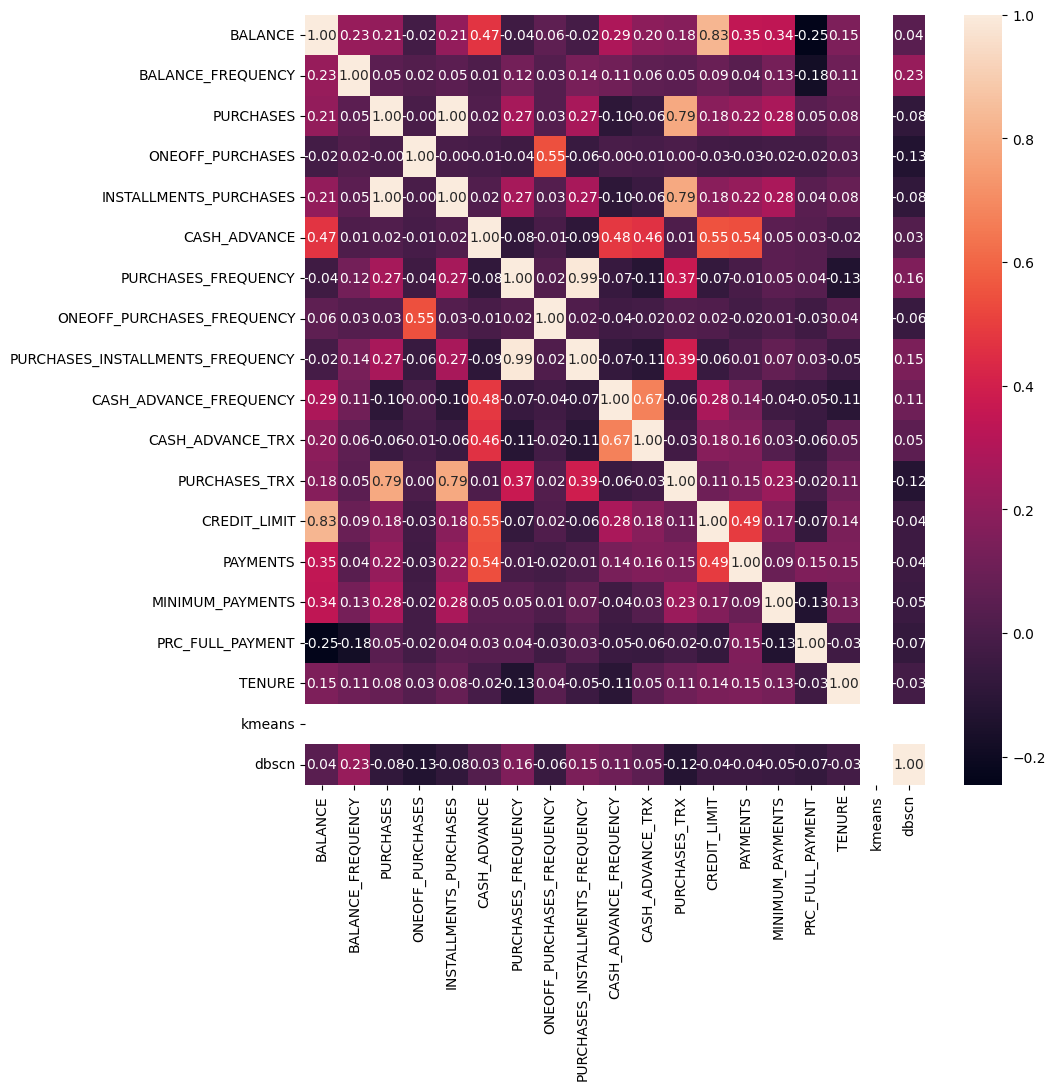

In [71]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=clust0.corr(), annot=True, fmt='.2f')

<Axes: xlabel='PURCHASES', ylabel='INSTALLMENTS_PURCHASES'>

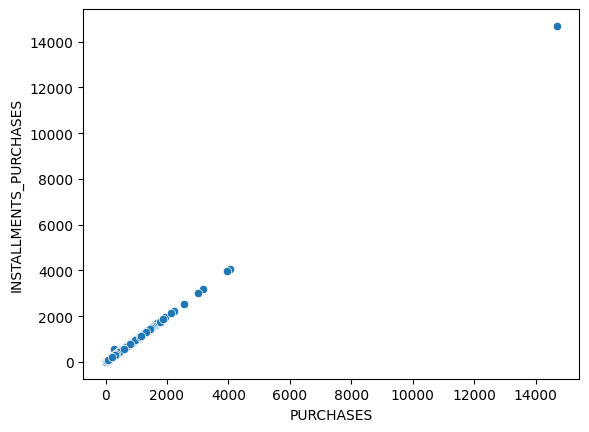

In [73]:
sns.scatterplot(clust0, x='PURCHASES', y='INSTALLMENTS_PURCHASES')

<Axes: xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

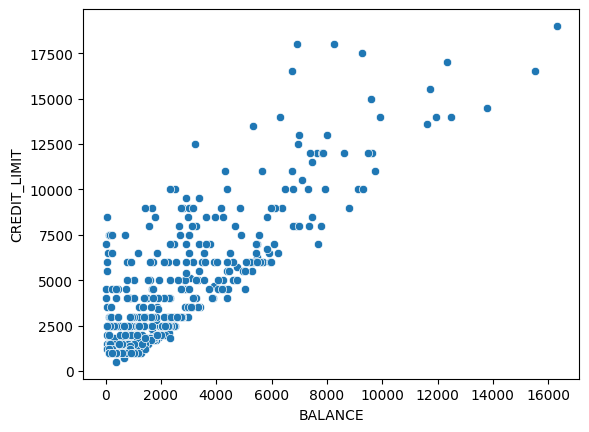

In [74]:
sns.scatterplot(clust0, x='BALANCE', y='CREDIT_LIMIT')

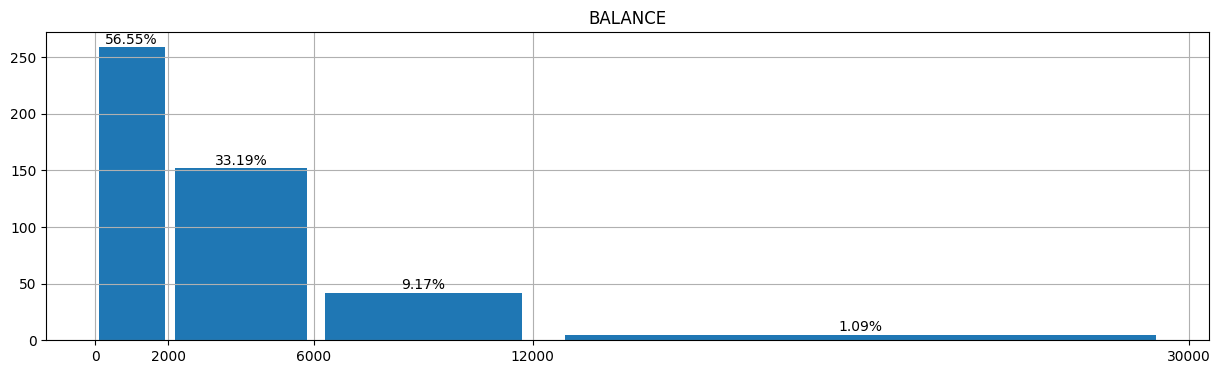

In [85]:
Bar(clust0, 'BALANCE', [0, 2000, 6000, 12000, 30000])

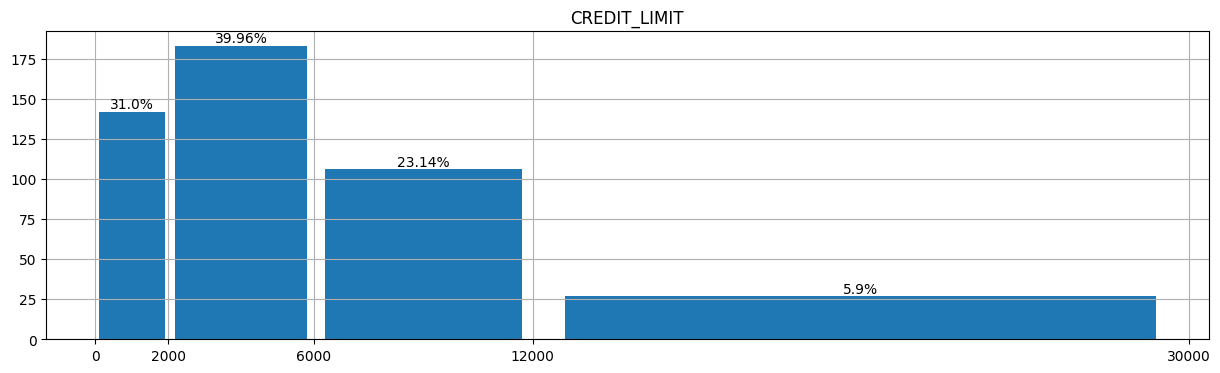

In [88]:
Bar(clust0, 'CREDIT_LIMIT', [0, 2000, 6000, 12000, 30000])

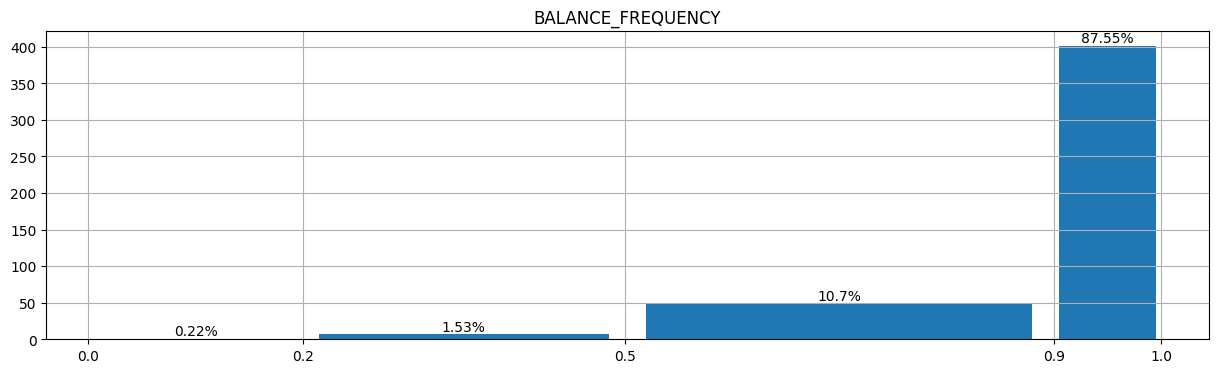

In [90]:
Bar(clust0, 'BALANCE_FREQUENCY', [0, .2, .5, .9, 1])

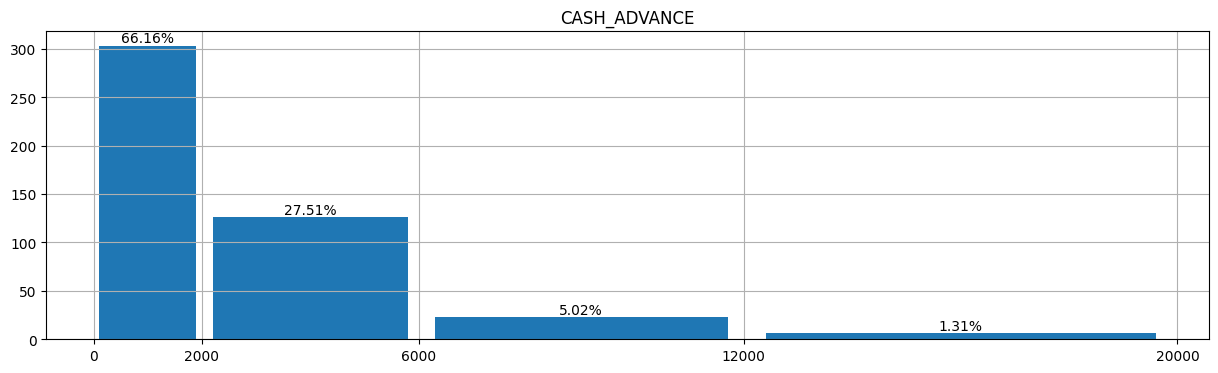

In [96]:
Bar(clust0, 'CASH_ADVANCE', [0, 2000, 6000, 12000, 20000])

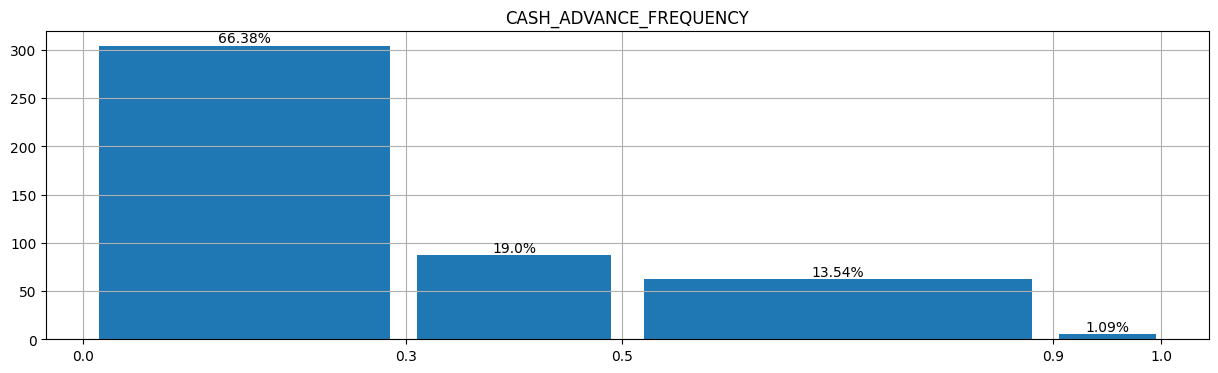

In [98]:
Bar(clust0, 'CASH_ADVANCE_FREQUENCY', [0, .3, .5, .9, 1])

In [ ]:
Bar(clust0, 'MINIMUM_PAYMENTS', [0, 2000, 6000, 12000, 20000])

- All purchases are associated with installemnts
- Most of the balance in this cluster is less than 6000 (90%), and (56%) is under 2000.
- (95%) of the credit limit is under 12000.
- The balance updates continuously as 90% of the customers does.
- Most of the customers don't usually take cash in advance.
- The customers who take cash in advance usually take between 2000 and 6000.

